# AA Project  - Learning about Pet Adoption using PetFinder.my Dataset

##### Machine Learning / Aprendizagem Automática

##### Sara C. Madeira, 2024/25

## Task 0 - Exploratory Data Analysis

## 0.1. Loading Data

In [1]:
import warnings

# Suppress specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
#LIBS
import pandas as pd 

breeds = pd.read_csv("data/raw/breed_labels.csv")
colors = pd.read_csv("data/raw/color_labels.csv")
states = pd.read_csv("data/raw/state_labels.csv")
df = pd.read_csv("data/raw/PetFinder_dataset.csv")

## 0.2. Understanding Data

In this task you should **understand better the features**, their distribution of values, potential errors, etc and plan/describe what data preprocessing steps should be performed next. Very important also is the distribution of values in the target (class distribution). 

Here you can find a notebook with some examples of what you can do in **Exploratory Data Analysis**: https://www.kaggle.com/artgor/exploration-of-data-step-by-step/notebook. You can also use Orange widgets for this.

- Observe features and their interactions;.
- Their distribution of values.
- Potential errors.
- **Plan/ describe what data preprocessing**.
- Observe class distribution too!!!



In [3]:
# =========================================================
# 1. Imports & Setup
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline if you're using Jupyter Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

# Use a specific style for your plots
plt.style.use('ggplot')

# Set Pandas display options with fully qualified names
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)


#### Basic info about the dataset

First we processed to check the number of non null features in each row. Straight off the bat we can discern that most nulls are encased in the "Name" and "Description" features (number is lower than 14993).

In [4]:
print("DataFrame Shape:", df.shape)
print("\n--- DataFrame Info ---")
df.info()

DataFrame Shape: (14993, 24)

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 1

Description column adds a lot of volume to each row, dropping it out just for visualization.

In [5]:
# Preview first few rows
df.drop('Description', axis=1).head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,850a43f90,3.0,2


#### Descriptive Statistics

We plotted the various features, to see possible correlations and dynamics in the data.

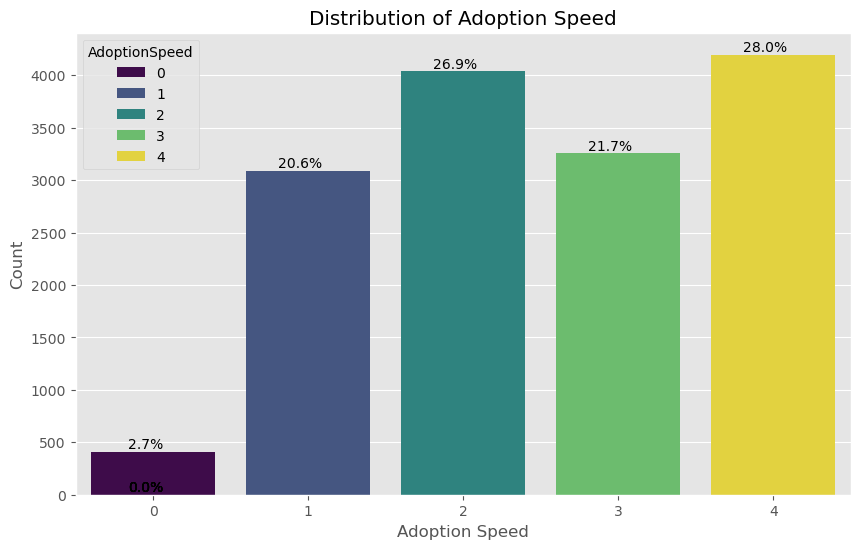

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots are displayed inline if you're using Jupyter Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

# Use a specific style for your plots
plt.style.use('ggplot')

# Set figure size for all plots
plt.rcParams['figure.figsize'] = (5, 2)

# Distribution of AdoptionSpeed
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='AdoptionSpeed', data=df, palette='viridis', hue='AdoptionSpeed')
# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Adoption Speed')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.show()


This doesnt take in account the pets in registration with no AdoptionSpeed?

In [7]:
# Count the number of occurrences of the value 4 in the AdoptionSpeed column
null_adoption_speed_count = df['AdoptionSpeed'].value_counts().get(4, 0)
null_adoption_speed_count

4197

There are in fact pets with Null adoption speeds! 


Also it's of note that there are NO pets in this dataset that waited between 90 and 100 days and the time duration of each category is not the same. 


For instance, class 0 is just one day interval while class 1 includes one week and class 3 includes a 60-days.

#### Fees

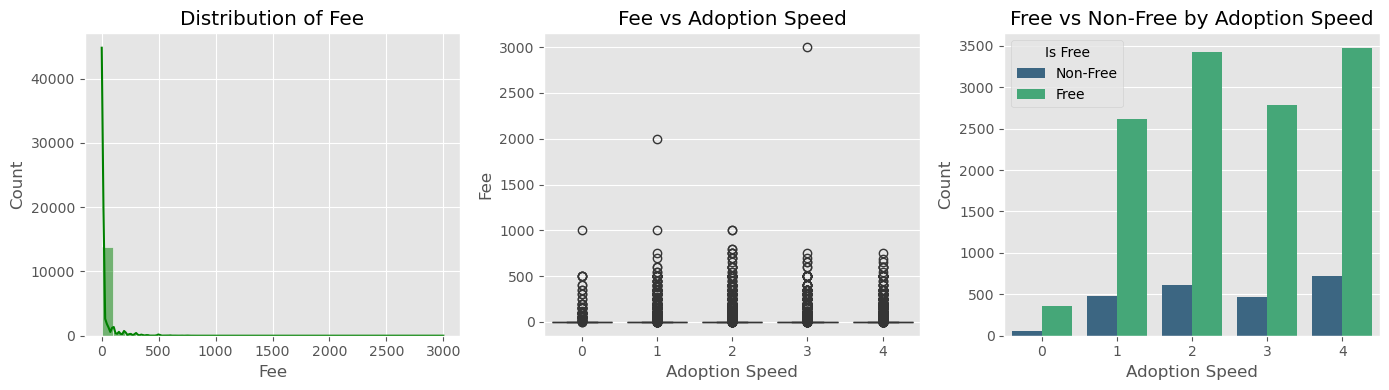

In [8]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Distribution of Fee
sns.histplot(df['Fee'], bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribution of Fee')
axes[0].set_xlabel('Fee')
axes[0].set_ylabel('Count')

# Fee vs AdoptionSpeed
sns.boxplot(x='AdoptionSpeed', y='Fee', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Fee vs Adoption Speed')
axes[1].set_xlabel('Adoption Speed')
axes[1].set_ylabel('Fee')

# Free vs Non-Free by Adoption Speed
sns.countplot(x='AdoptionSpeed', hue=(df['Fee'] == 0), data=df, palette='viridis', ax=axes[2])
axes[2].set_title('Free vs Non-Free by Adoption Speed')
axes[2].set_xlabel('Adoption Speed')
axes[2].set_ylabel('Count')
axes[2].legend(title='Is Free', labels=['Non-Free', 'Free'])

# Adjust layout
plt.tight_layout()
plt.show()

Most pets are free. Few adoptions cost money (up to 3000) and it seems that they slightly decreases the chance of adoption.

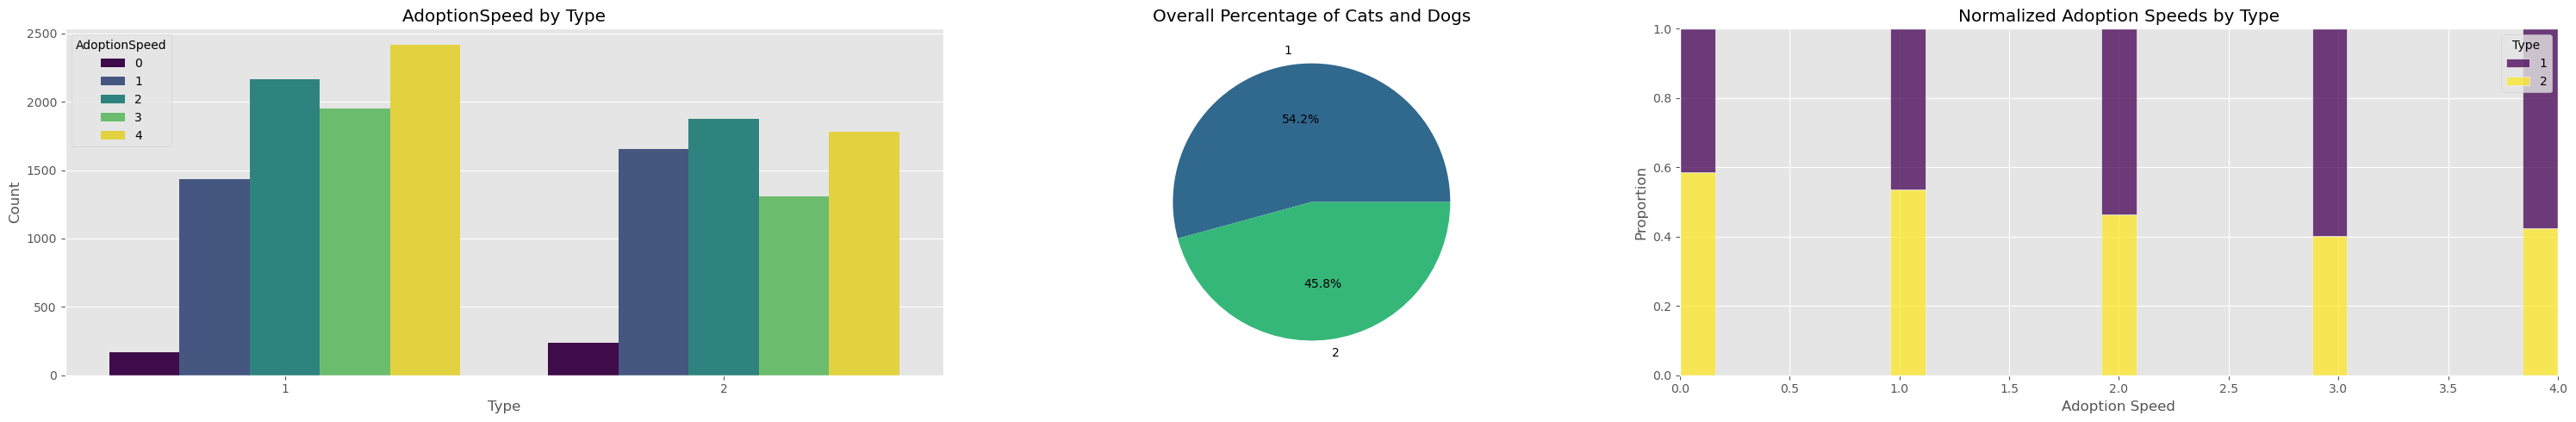

None


In [9]:
def prepare_plot_dict(df, x, main_count):
    """
    Prepares a dictionary mapping each bar's height (raw count)
    to the difference from baseline distribution (%) for that AdoptionSpeed class.
    """
    plot_dict = {}
    for val in df[x].unique():
        subset = df[df[x] == val]
        subset_count = subset['AdoptionSpeed'].value_counts(normalize=True) * 100
        diff = subset_count - main_count
        # For each (AdoptionSpeed class, difference) pair, store in the dictionary
        for class_val, diff_val in diff.items():
            if class_val not in plot_dict:
                plot_dict[class_val] = {}
            plot_dict[class_val][val] = diff_val
    return plot_dict

def make_count_plot(df, x, hue="AdoptionSpeed", title=""):
    """
    1) Plots a countplot of `x` vs. `hue` (default: AdoptionSpeed),
       then annotates each bar with +/- % difference relative to
       the global baseline distribution (main_count).
    2) Creates a second subplot to show overall distribution of Cats & Dogs.
    3) Creates a third subplot to show normalized adoption speeds by the count of type.
    """

    # Calculate the main_count (baseline distribution of AdoptionSpeed in %)
    main_count = df['AdoptionSpeed'].value_counts(normalize=True) * 100

    fig, axes = plt.subplots(1, 3, figsize=(30, 5))

    # --- Subplot 1: Main count plot with difference annotation ---
    ax1 = sns.countplot(x=x, data=df, hue=hue, palette="viridis", ax=axes[0])
    ax1.set_title(f"AdoptionSpeed {title}")
    ax1.set_xlabel(x)
    ax1.set_ylabel("Count")

    # Build the dictionary that maps bar heights to difference-from-baseline
    plot_dict = prepare_plot_dict(df, x, main_count)

    # Annotate each bar
    for patch in ax1.patches:
        h = patch.get_height() if pd.notnull(patch.get_height()) else 0
        # Get the class and value for the current bar
        class_val = int(patch.get_x() + patch.get_width() / 2)
        val = patch.get_x() + patch.get_width() / 2
        # Look up the difference from baseline distribution
        diff_val = plot_dict[class_val][val] if class_val in plot_dict and val in plot_dict[class_val] else 0

    # --- Subplot 2: Overall distribution of Cats vs. Dogs ---
    type_counts = df['Type'].value_counts(normalize=True) * 100
    ax2 = axes[1]
    ax2.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(type_counts)))
    ax2.set_title("Overall Percentage of Cats and Dogs")

    # --- Subplot 3: Normalized adoption speeds by the count of type ---
    ax3 = sns.histplot(data=df, x='AdoptionSpeed', hue='Type', multiple='fill', palette='viridis', ax=axes[2])
    ax3.set_title("Normalized Adoption Speeds by Type")
    ax3.set_xlabel("Adoption Speed")
    ax3.set_ylabel("Proportion")

    plt.tight_layout()
    plt.show()

print(make_count_plot(df, x="Type", hue="AdoptionSpeed", title="by Type"))


Cats are more likely to be adopted early compared to dogs, and the overall percentage of cats not being adopted is lower (4 AdoptionSpeed)


However, does this necessarily indicate a preference for cats? or could it be that the dataset bias. There is a 8.4% higher count of dogs in this dataset.


Another aspect worth exploring is the adoption rates by state, considering that in many Islamic sects, keeping dogs as household pets is controversial and less common compared to cats.

#### Ages

Applying a logarithmic transformation to Age compresses larger values more than smaller ones, helping to reduce skew, so we can better visualise data spanning wide ranges (useful for interpreting distributions with long tails or large variations).

- log10(1) = 0 → Age = 1 month.
- log10(10) = 1 → Age = 10 months.
- log10(100) = 2 → Age = 100 months.

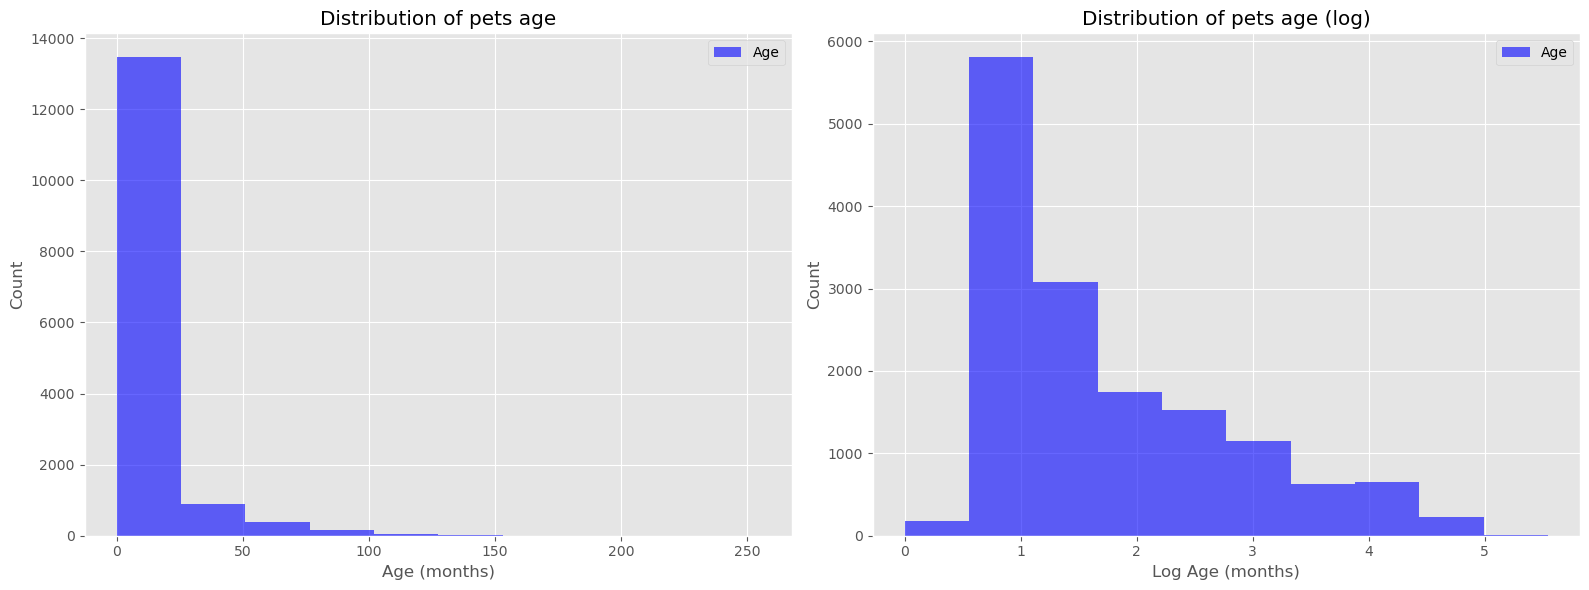

In [10]:

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Subplot (1): Raw Age Distribution
ax[0].set_title('Distribution of pets age')
df['Age'].plot(kind='hist', color='blue', alpha=0.6, ax=ax[0])
ax[0].set_xlabel('Age (months)')
ax[0].set_ylabel('Count')
ax[0].legend()

# Subplot (2): Log Age Distribution
ax[1].set_title('Distribution of pets age (log)')
np.log1p(df['Age']).plot(kind='hist', color='blue', alpha=0.6, ax=ax[1])
ax[1].set_xlabel('Log Age (months)')
ax[1].set_ylabel('Count')
ax[1].legend()

plt.tight_layout()
plt.show()


The dataset is dominated by younger pets, as shown in both plots. Specifically the log-transformed plot reduces the skewness of the distribution, making it easier to visualise this agglomeration around one month of age.

High class imbalance.

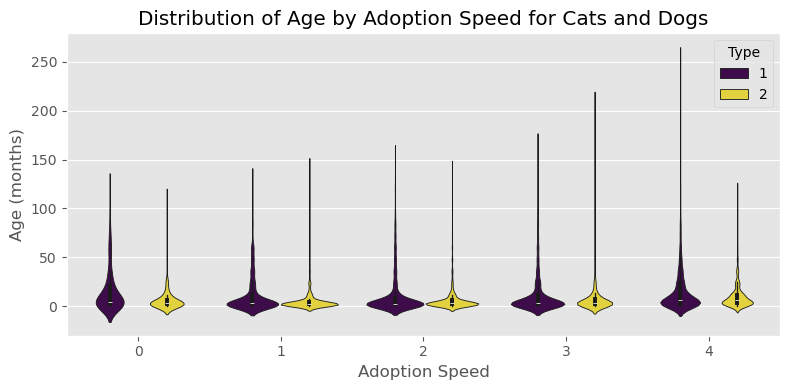

In [11]:
plt.figure(figsize=(8, 4))

sns.violinplot(x='AdoptionSpeed', y='Age', hue='Type', data=df, palette='viridis')
plt.title('Distribution of Age by Adoption Speed for Cats and Dogs')
plt.xlabel('Adoption Speed')
plt.ylabel('Age (months)')
plt.legend(title='Type')

plt.tight_layout()
plt.show()


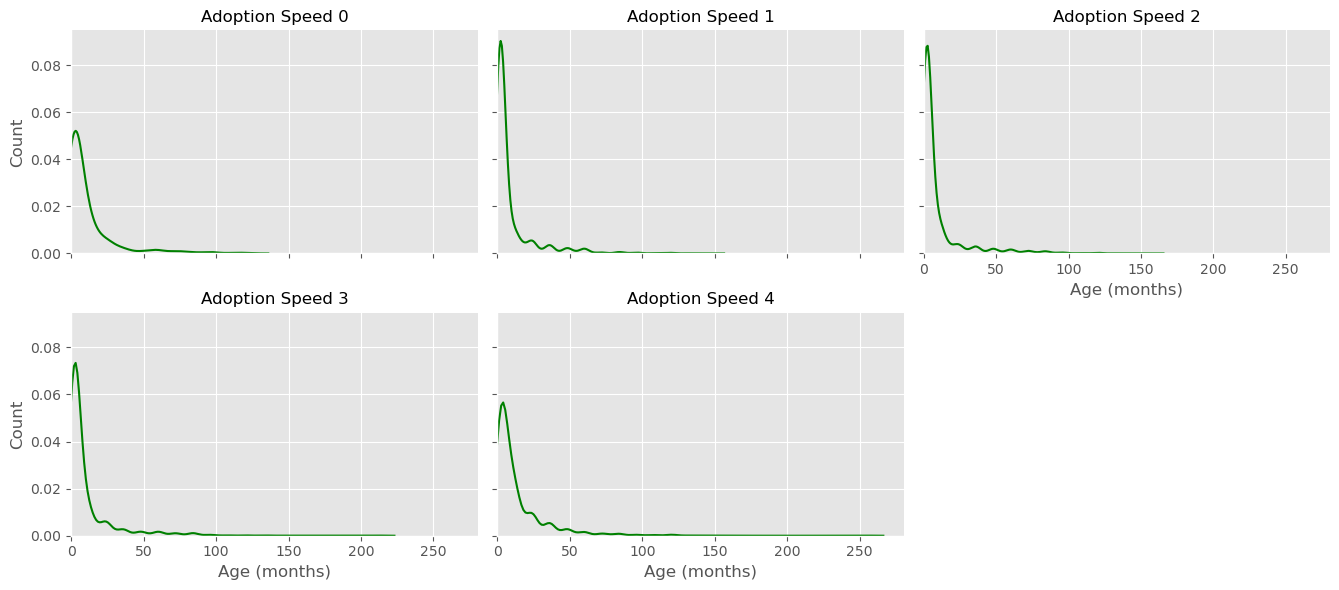

In [12]:
import plotly.graph_objs as go
import plotly.offline as py

# Ensure plots are displayed inline if you're using Jupyter Notebook
get_ipython().run_line_magic('matplotlib', 'inline')
data = []
for a in range(5):
    df_speed = df.loc[df['AdoptionSpeed'] == a]

    data.append(go.Scatter(
        x = df_speed['Age'].value_counts().sort_index().index,
        y = df_speed['Age'].value_counts().sort_index().values,
        name = str(a)
    ))
    
layout = go.Layout(dict(title = "AdoptionSpeed trends by Age",
                  xaxis = dict(title = 'Age (months)'),
                  yaxis = dict(title = 'Counts'),
                  )
                  )
py.iplot(dict(data=data, layout=layout), filename='basic-line')

# Use a specific style for your plots
plt.style.use('ggplot')

# Set figure size for all plots
plt.rcParams['figure.figsize'] = (8, 4)

# Create a FacetGrid with 5 subplots, one for each AdoptionSpeed
g = sns.FacetGrid(df, col="AdoptionSpeed", col_wrap=3, height=3, aspect=1.5)
g.map(sns.kdeplot, "Age", color='green')

# Set titles and labels
g.set_titles("Adoption Speed {col_name}")
g.set_axis_labels("Age (months)", "Count")

# Set x-axis to start from 0
for ax in g.axes.flat:
    ax.set_xlim(left=0)

plt.show()

Young pets are adopted quickly, with the majority being successfully adopted. Most pets in the dataset are under 4 months old, with a significant spike at 2 months. There also appears to be a tendency for some people to approximate ages by rounding them to years or multiples of 12 months. 


- It might be useful to create binary variables based on age for the downstream analysis.

#### Does having names affect Adoption speed?

Not just NaN "Name" entries but also pets with names like no name and unnamed

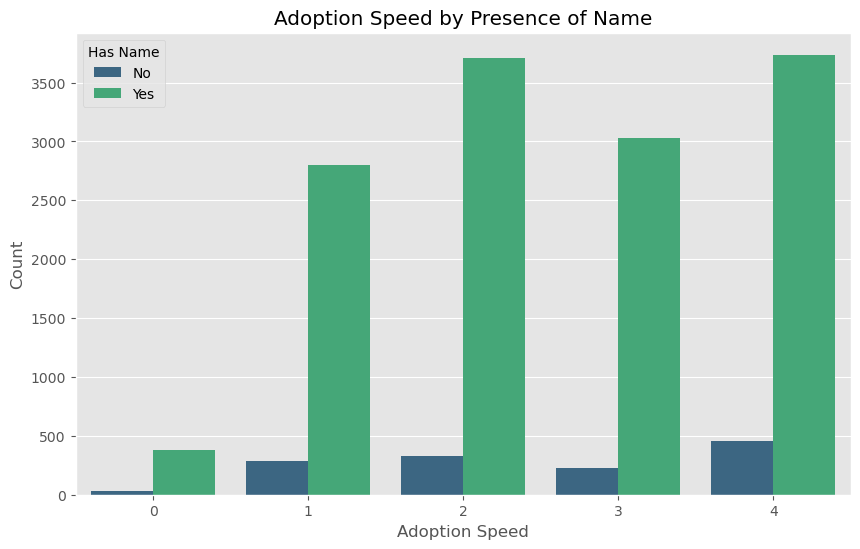

In [13]:
# Create a new column to indicate whether the pet has a name or not

df['HasName'] = df['Name'].apply(lambda x: 0 if pd.isnull(x) or x.strip().lower() in ['no name', 'noname', 'unnamed'] else 1)

# Plot the distribution of AdoptionSpeed for pets with and without names
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', hue='HasName', data=df, palette='viridis')
plt.title('Adoption Speed by Presence of Name')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.legend(title='Has Name', labels=['No', 'Yes'])
plt.show()

Pets with no name have much lower rates of adoption.

##### Gender

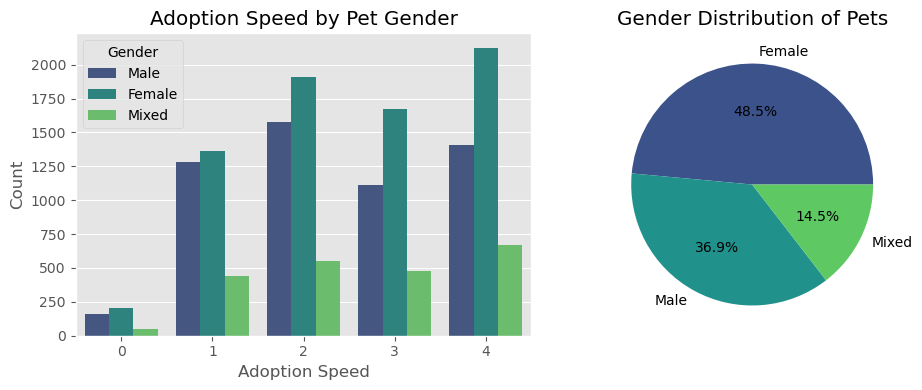

In [14]:
# Define a color palette
palette = sns.color_palette('viridis', 3)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Subplot 1: Adoption Speed by Gender
sns.countplot(x='AdoptionSpeed', hue='Gender', data=df, palette=palette, ax=axes[0])
axes[0].set_title('Adoption Speed by Pet Gender')
axes[0].set_xlabel('Adoption Speed')
axes[0].set_ylabel('Count')
axes[0].legend(title='Gender', labels=['Male', 'Female', 'Mixed'])

# Subplot 2: Gender Distribution
gender_counts = df['Gender'].value_counts()
gender_labels = {1: 'Male', 2: 'Female', 3: 'Mixed'}
gender_counts.index = gender_counts.index.map(gender_labels)
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=palette)
axes[1].set_title('Gender Distribution of Pets')

# Adjust layout
plt.tight_layout()
plt.show()


It seems that male pets are adopted faster than female. This can be just due to an imbalance in male/ female adoption population, having a bigger female population.

#### Colour

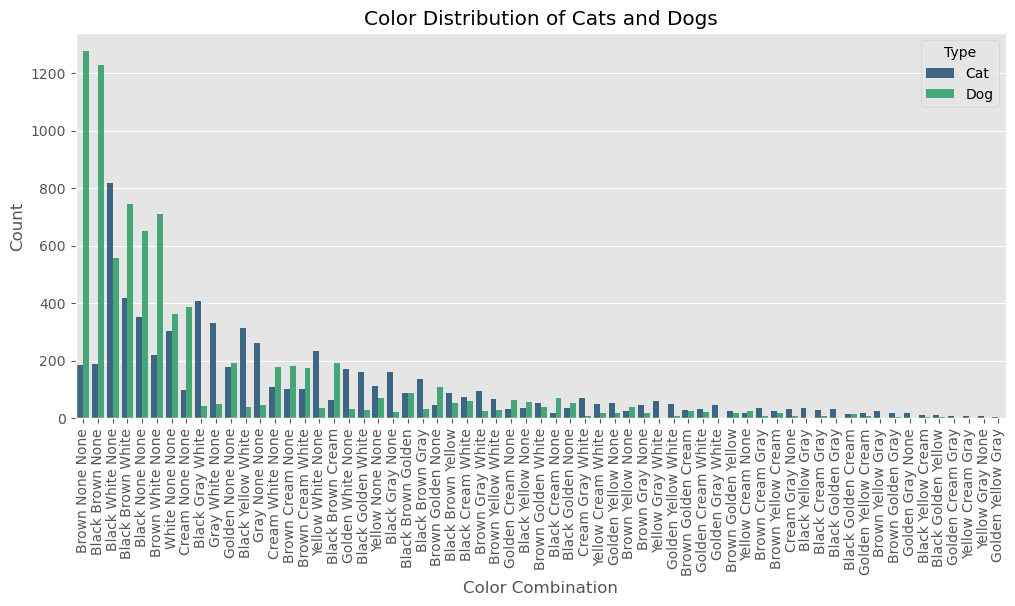

In [15]:
# Create a copy of the original df so we don't modify it
df_colors = df.copy()

# Map Type to 'Dog' and 'Cat' for better readability
df_colors['Type'] = df_colors['Type'].map({1: 'Dog', 2: 'Cat'})

# Merge df_colors with colors for Color1, Color2, Color3
df_colors = df_colors.merge(colors, left_on='Color1', right_on='ColorID', how='left', suffixes=('', '_1'))
df_colors = df_colors.rename(columns={'ColorName': 'ColorName_1'})
df_colors = df_colors.merge(colors, left_on='Color2', right_on='ColorID', how='left', suffixes=('', '_2'))
df_colors = df_colors.rename(columns={'ColorName': 'ColorName_2'})
df_colors = df_colors.merge(colors, left_on='Color3', right_on='ColorID', how='left', suffixes=('', '_3'))
df_colors = df_colors.rename(columns={'ColorName': 'ColorName_3'})

# Fill NaN values with 'None'
df_colors['ColorName_1'].fillna('None', inplace=True)
df_colors['ColorName_2'].fillna('None', inplace=True)
df_colors['ColorName_3'].fillna('None', inplace=True)

# Create a new column for combined colors
df_colors['CombinedColors'] = df_colors[['ColorName_1', 'ColorName_2', 'ColorName_3']] \
                                    .apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Plot color distribution for cats & dogs
plt.figure(figsize=(12, 5))
sns.countplot(
    x='CombinedColors',
    hue='Type',
    data=df_colors,
    palette='viridis',
    order=df_colors['CombinedColors'].value_counts().index
)
plt.title('Color Distribution of Cats and Dogs')
plt.xlabel('Color Combination')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Maturity Size

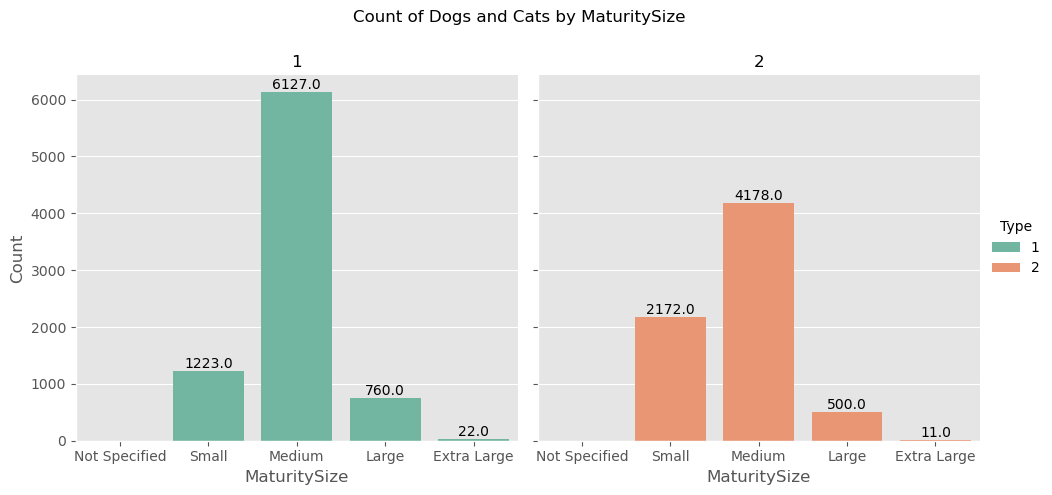

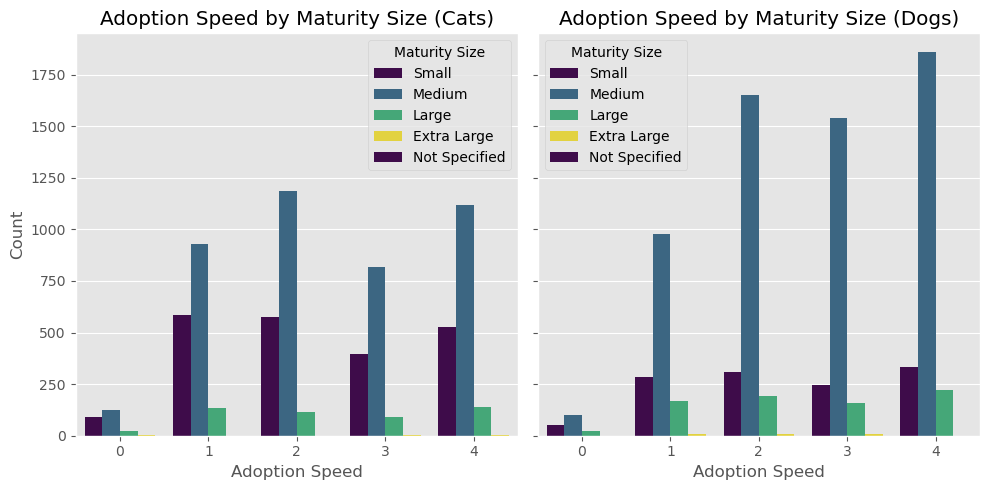

In [16]:
def make_factor_plot(df, x, col, title, hue, ann=False):
    g = sns.FacetGrid(df, col=col, hue=hue, palette='Set2', height=5, aspect=1)
    g.map(sns.countplot, x, order=[0, 1, 2, 3, 4], dodge=True)
    g.add_legend(title=hue.capitalize())
    g.set_axis_labels(x, 'Count')
    g.set_titles('{col_name}')
    g.set(xticks=[0, 1, 2, 3, 4], xticklabels=['Not Specified', 'Small', 'Medium', 'Large', 'Extra Large'])
    
    # Add main title
    g.figure.suptitle(title, fontsize=12)
    
    if ann:
        for ax in g.axes.flat:
            for p in ax.patches:
                height = p.get_height()
                if height > 0:
                    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
    plt.subplots_adjust(top=0.85)
    plt.show()

# Usage of make_factor_plot
make_factor_plot(df, x='MaturitySize', col='Type', title='Count of Dogs and Cats by MaturitySize', hue='Type', ann=True)

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Dogs
sns.countplot(x='AdoptionSpeed', hue='MaturitySize', data=df[df['Type'] == 1], palette='viridis', ax=axes[1])
axes[1].set_title('Adoption Speed by Maturity Size (Dogs)')
axes[1].set_xlabel('Adoption Speed')
axes[1].set_ylabel('Count')
axes[1].legend(title='Maturity Size', labels=['Small', 'Medium', 'Large', 'Extra Large', 'Not Specified'])

# Cats
sns.countplot(x='AdoptionSpeed', hue='MaturitySize', data=df[df['Type'] == 2], palette='viridis', ax=axes[0])
axes[0].set_title('Adoption Speed by Maturity Size (Cats)')
axes[0].set_xlabel('Adoption Speed')
axes[0].set_ylabel('Count')
axes[0].legend(title='Maturity Size', labels=['Small', 'Medium', 'Large', 'Extra Large', 'Not Specified'])


plt.tight_layout()
plt.show()


Medium-sized Cats and Dogs are the most common maturity size in the dataset, followed by small-sized pets, while large and extra-large pets are much less frequent.

AdoptionSpeed 4, representing pets not adopted after 100 days, dominates for most maturity sizes. However, small and medium-sized cats have higher adoption rates across faster adoption speeds. This suggests a potential preference, while large and extra-large cats and all dogs may face adoption challenges.

#### Breeds

In [17]:
# Filter breeds DataFrame for cats and dogs
cat_breeds = breeds[breeds['Type'] == 2]
dog_breeds = breeds[breeds['Type'] == 1]

# Count unique breeds for Breed1 and Breed2
cat_breed1_count = df[df['Breed1'].isin(cat_breeds['BreedID'])]['Breed1'].nunique()
cat_breed2_count = df[df['Breed2'].isin(cat_breeds['BreedID'])]['Breed2'].nunique()
dog_breed1_count = df[df['Breed1'].isin(dog_breeds['BreedID'])]['Breed1'].nunique()
dog_breed2_count = df[df['Breed2'].isin(dog_breeds['BreedID'])]['Breed2'].nunique()

print(f"Number of unique cat breeds in Breed1: {cat_breed1_count}")
print(f"Number of unique cat breeds in Breed2: {cat_breed2_count}")
print(f"Number of unique dog breeds in Breed1: {dog_breed1_count}")
print(f"Number of unique dog breeds in Breed2: {dog_breed2_count}")

Number of unique cat breeds in Breed1: 59
Number of unique cat breeds in Breed2: 51
Number of unique dog breeds in Breed1: 116
Number of unique dog breeds in Breed2: 83


There are more breeds of dogs (1 and 2) than cats. May ignore second type of breeds.

#### Health

There are four features showing health of the pets:

- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

I think that these features are very important - most people would prefer a healthy pet. While sterilization isn't the main concern, having healty and dewormed pet should have a great importance. Let's see whether I'm right!

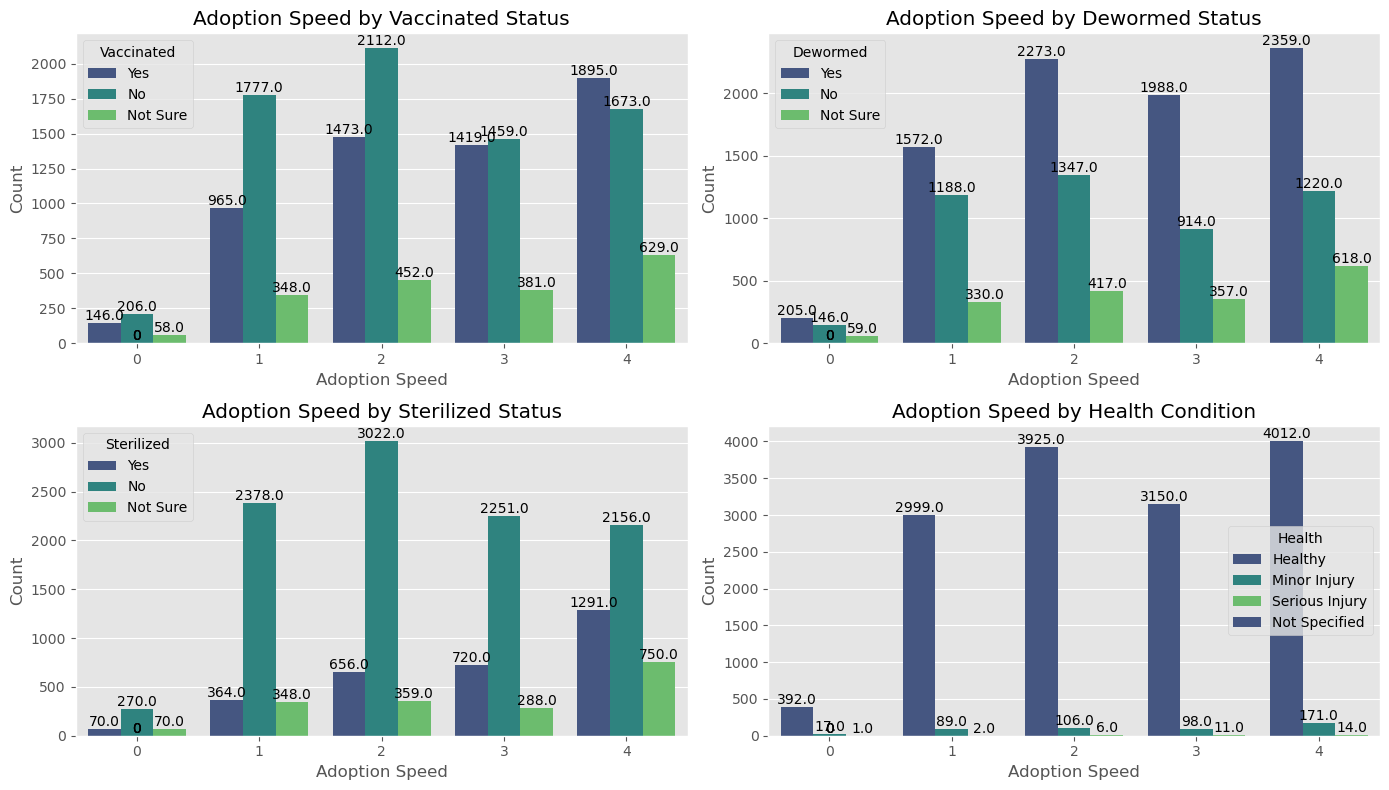

In [18]:
# Define a color palette
palette = sns.color_palette('viridis', 3)

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Subplot 1: Adoption Speed by Vaccinated
ax1 = sns.countplot(x='AdoptionSpeed', hue='Vaccinated', data=df, palette=palette, ax=axes[0, 0])
axes[0, 0].set_title('Adoption Speed by Vaccinated Status')
axes[0, 0].set_xlabel('Adoption Speed')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend(title='Vaccinated', labels=['Yes', 'No', 'Not Sure'])

# Annotate bars with counts
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 2: Adoption Speed by Dewormed
ax2 = sns.countplot(x='AdoptionSpeed', hue='Dewormed', data=df, palette=palette, ax=axes[0, 1])
axes[0, 1].set_title('Adoption Speed by Dewormed Status')
axes[0, 1].set_xlabel('Adoption Speed')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend(title='Dewormed', labels=['Yes', 'No', 'Not Sure'])

# Annotate bars with counts
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 3: Adoption Speed by Sterilized
ax3 = sns.countplot(x='AdoptionSpeed', hue='Sterilized', data=df, palette=palette, ax=axes[1, 0])
axes[1, 0].set_title('Adoption Speed by Sterilized Status')
axes[1, 0].set_xlabel('Adoption Speed')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(title='Sterilized', labels=['Yes', 'No', 'Not Sure'])

# Annotate bars with counts
for p in ax3.patches:
    height = p.get_height()
    ax3.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 4: Adoption Speed by Health
ax4 = sns.countplot(x='AdoptionSpeed', hue='Health', data=df, palette=palette, ax=axes[1, 1])
axes[1, 1].set_title('Adoption Speed by Health Condition')
axes[1, 1].set_xlabel('Adoption Speed')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Health', labels=['Healthy', 'Minor Injury', 'Serious Injury', 'Not Specified'])

# Annotate bars with counts
for p in ax4.patches:
    height = p.get_height()
    ax4.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

Pets that are healthy, vaccinated, dewormed, and sterilised are adopted more quickly and frequently, as shown by higher adoption counts at faster speeds (0–2). In contrast, pets with unknown or negative statuses in these categories, as well as those with injuries, are more likely to fall into slower adoption speeds, particularly Adoption Speed 4. 


These shows well-cared-for have an improve their likelihood of adoption.

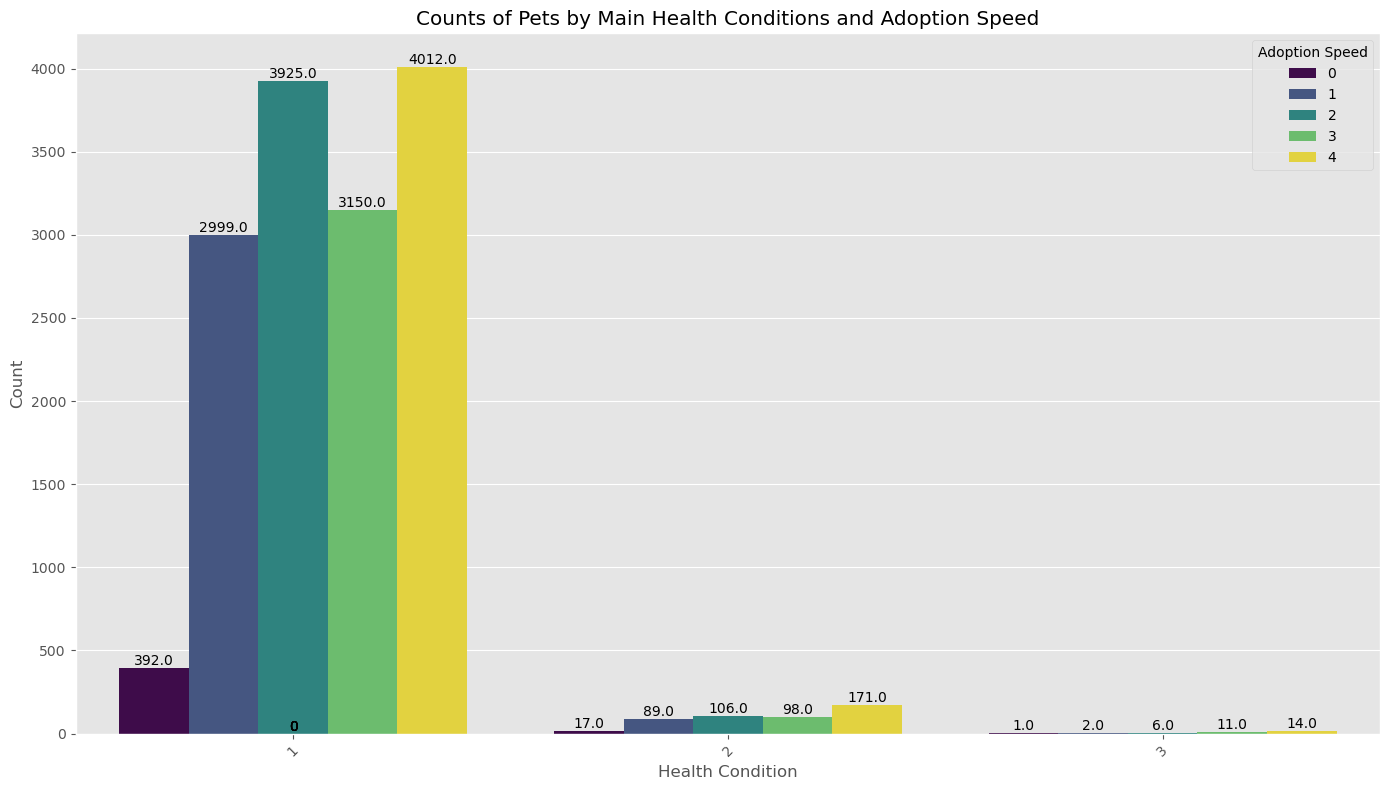

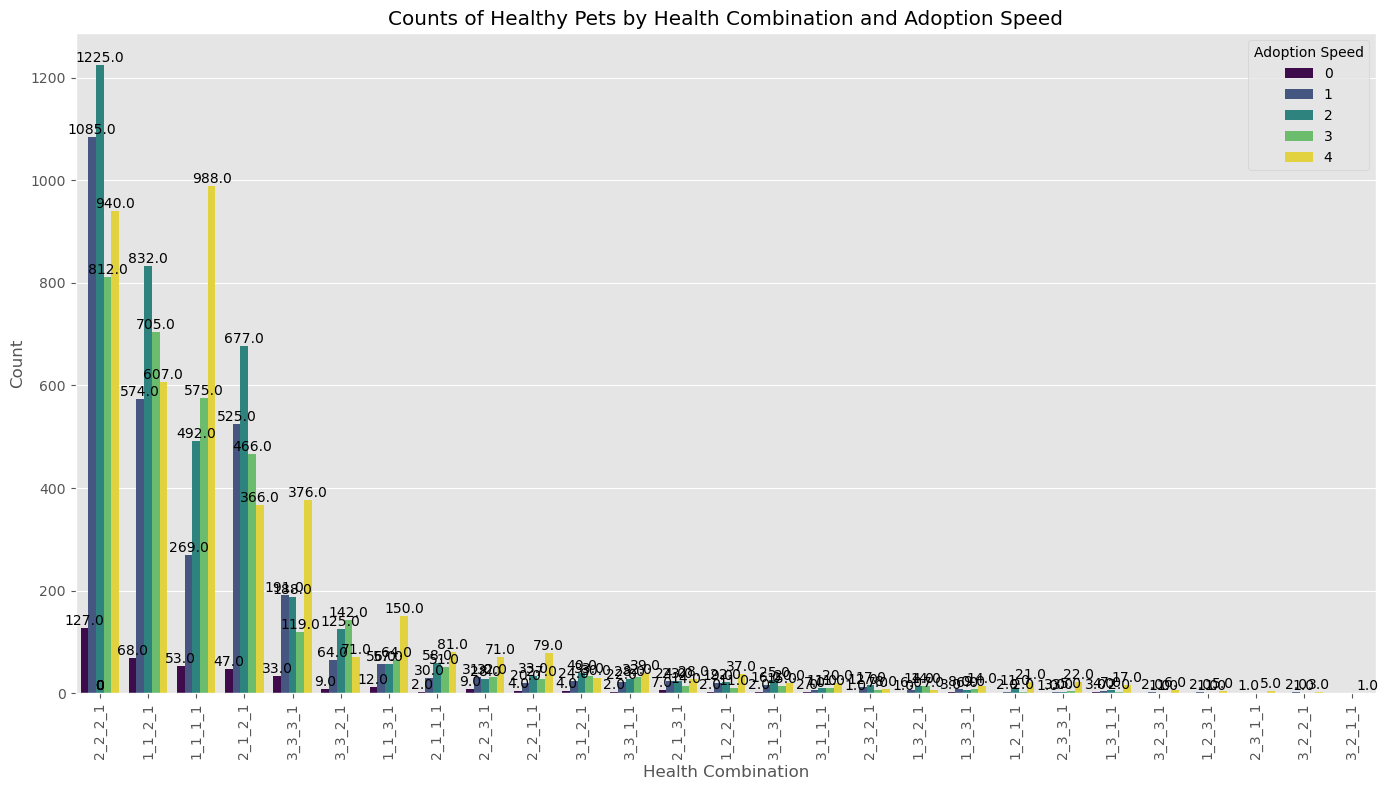

In [19]:
# Filter the DataFrame to include only certain health conditions
filtered_df = df[df['Health'].isin([1, 2, 3])]

# Plot the counts of pets by main health conditions and Adoption Speed
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Health', hue='AdoptionSpeed', data=filtered_df, palette='viridis')
plt.title('Counts of Pets by Main Health Conditions and Adoption Speed')
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Adoption Speed')

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()
# Create a new column for the combination of health-related conditions
df['HealthCombo'] = df.apply(lambda row: f"{row['Vaccinated']}_{row['Dewormed']}_{row['Sterilized']}_{row['Health']}", axis=1)

# Filter the DataFrame to include only healthy pets
healthy_df = df[df['Health'] == 1]

# Plot the counts of healthy pets by health combination and Adoption Speed
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='HealthCombo', hue='AdoptionSpeed', data=healthy_df, palette='viridis', order=healthy_df['HealthCombo'].value_counts().index)
plt.title('Counts of Healthy Pets by Health Combination and Adoption Speed')
plt.xlabel('Health Combination')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Adoption Speed')

# Annotate each bar with the count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Healthy, vaccinated, dewormed, and non-sterilised pets (1_1_2_1) are adopted more quickly, than sterilised ones.


#### Quantity

There can be more than one pet per entry/ row. Lets see how it affect AdoptionSpeeds.

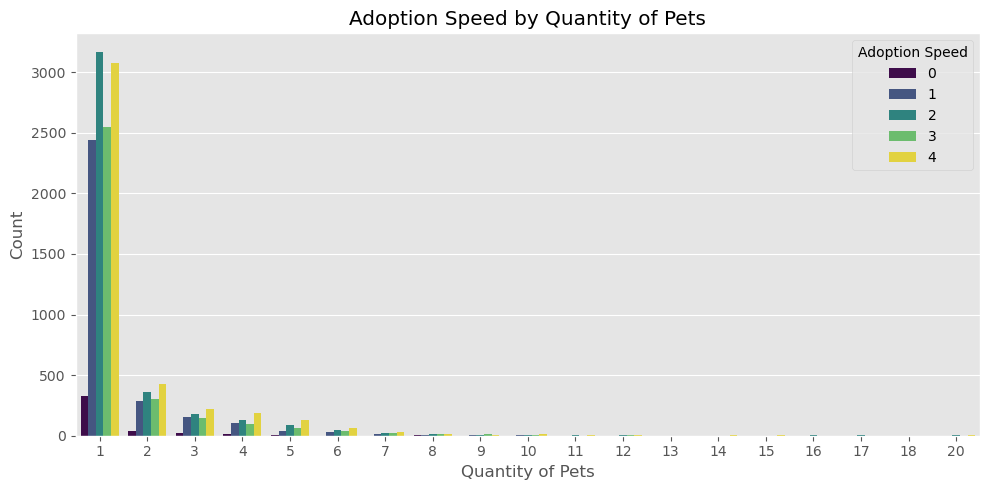

In [20]:
# Create a figure with subplots
plt.figure(figsize=(10, 5))

# Plot the distribution of AdoptionSpeed for different quantities of pets
sns.countplot(x='Quantity', hue='AdoptionSpeed', data=df, palette='viridis')
plt.title('Adoption Speed by Quantity of Pets')
plt.xlabel('Quantity of Pets')
plt.ylabel('Count')
plt.legend(title='Adoption Speed')

# Show the plot
plt.tight_layout()
plt.show()
#

Looks like counts are proportional to differing amounts of the sets. Seems quantity has little to do with adoption speed.

Most entries are of individual pets.

#### Photo and Video Amount

Do they affect adoption speeds?

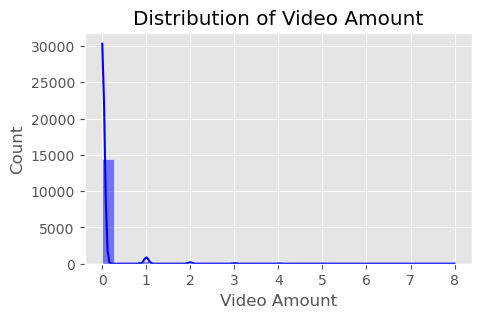

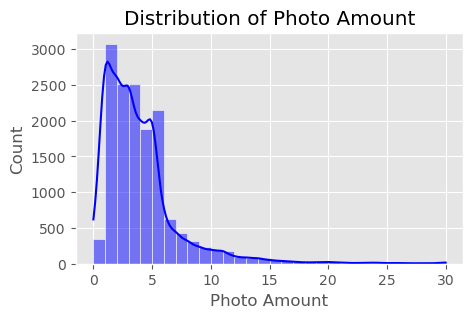

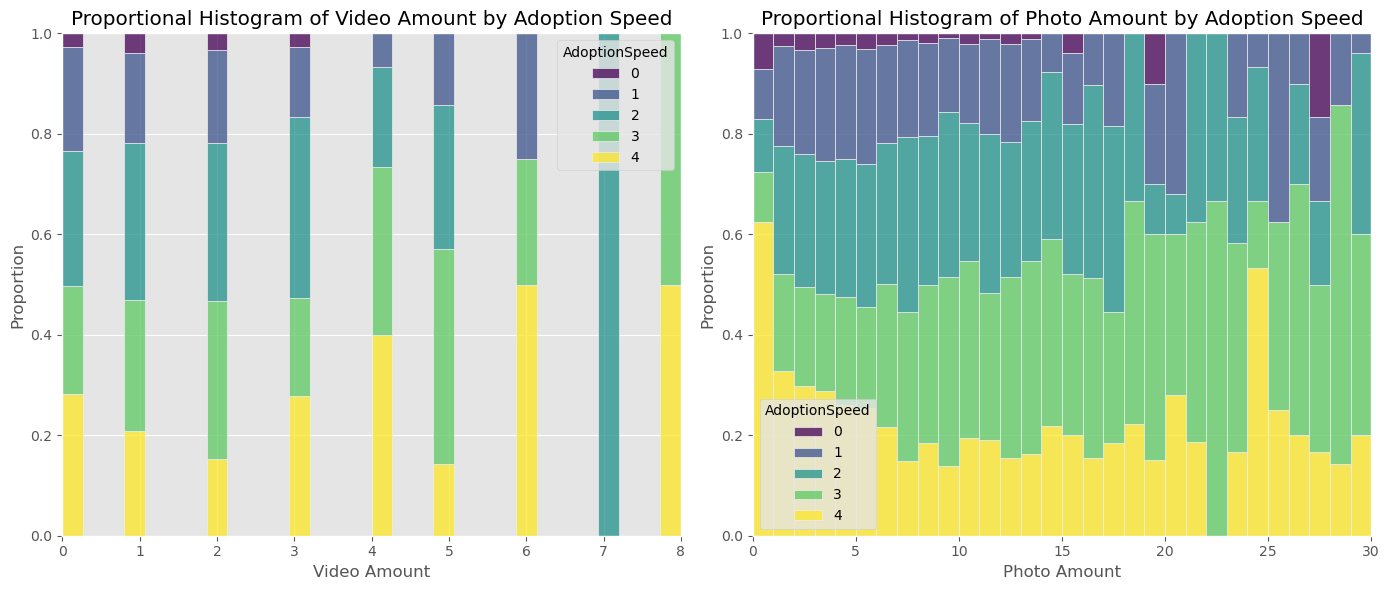

In [21]:
# Distribution of VideoAmt
plt.figure(figsize=(5, 3))
sns.histplot(df['VideoAmt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Video Amount')
plt.xlabel('Video Amount')
plt.ylabel('Count')
plt.show()

# Distribution of PhotoAmt
plt.figure(figsize=(5, 3))
sns.histplot(df['PhotoAmt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Photo Amount')
plt.xlabel('Photo Amount')
plt.ylabel('Count')
plt.show()


# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Histogram of Video Amount by Adoption Speed
sns.histplot(df, x='VideoAmt', bins=30, kde=False, hue='AdoptionSpeed', multiple='fill', ax=axes[0], palette='viridis')
axes[0].set_title('Proportional Histogram of Video Amount by Adoption Speed')
axes[0].set_xlabel('Video Amount')
axes[0].set_ylabel('Proportion')

# Subplot 2: Histogram of Photo Amount by Adoption Speed
sns.histplot(df, x='PhotoAmt', bins=30, kde=False, hue='AdoptionSpeed', multiple='fill', ax=axes[1], palette='viridis')
axes[1].set_title('Proportional Histogram of Photo Amount by Adoption Speed')
axes[1].set_xlabel('Photo Amount')
axes[1].set_ylabel('Proportion')

# Adjust layout
plt.tight_layout()
plt.show()

More photos seem to  increase the adoption speed 2 and 3 and decrease number 4.

Distributions for both is very heavy on low values, which may cause issues of class imbalance.

#### States

Top three states account for ~90% of ads (Selangor, Kuala Lumpur, and  Pulau Pinang). Is it just because of their bigger population?

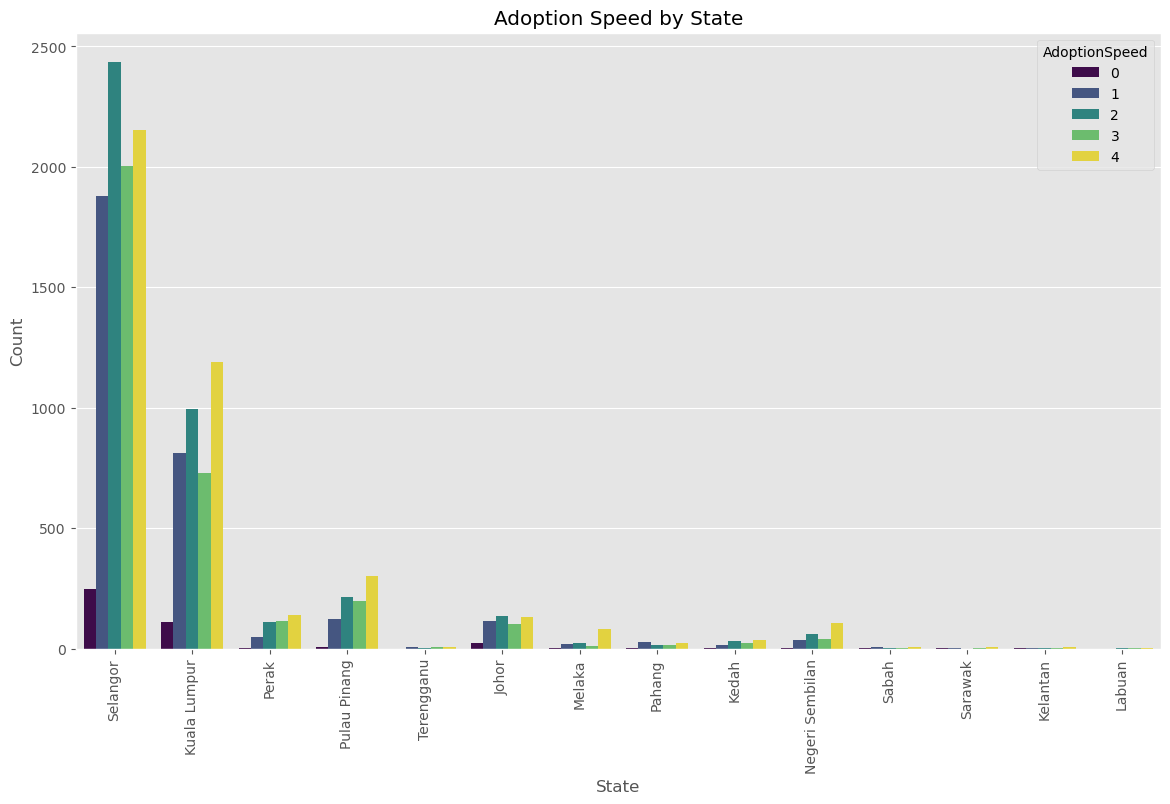

In [22]:

# Merge df with states to get state names
df = df.merge(states, left_on='State', right_on='StateID', how='left')

# Adoption Speed by State
plt.figure(figsize=(14, 8))
sns.countplot(x='StateName', hue='AdoptionSpeed', data=df, palette='viridis')
plt.title('Adoption Speed by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

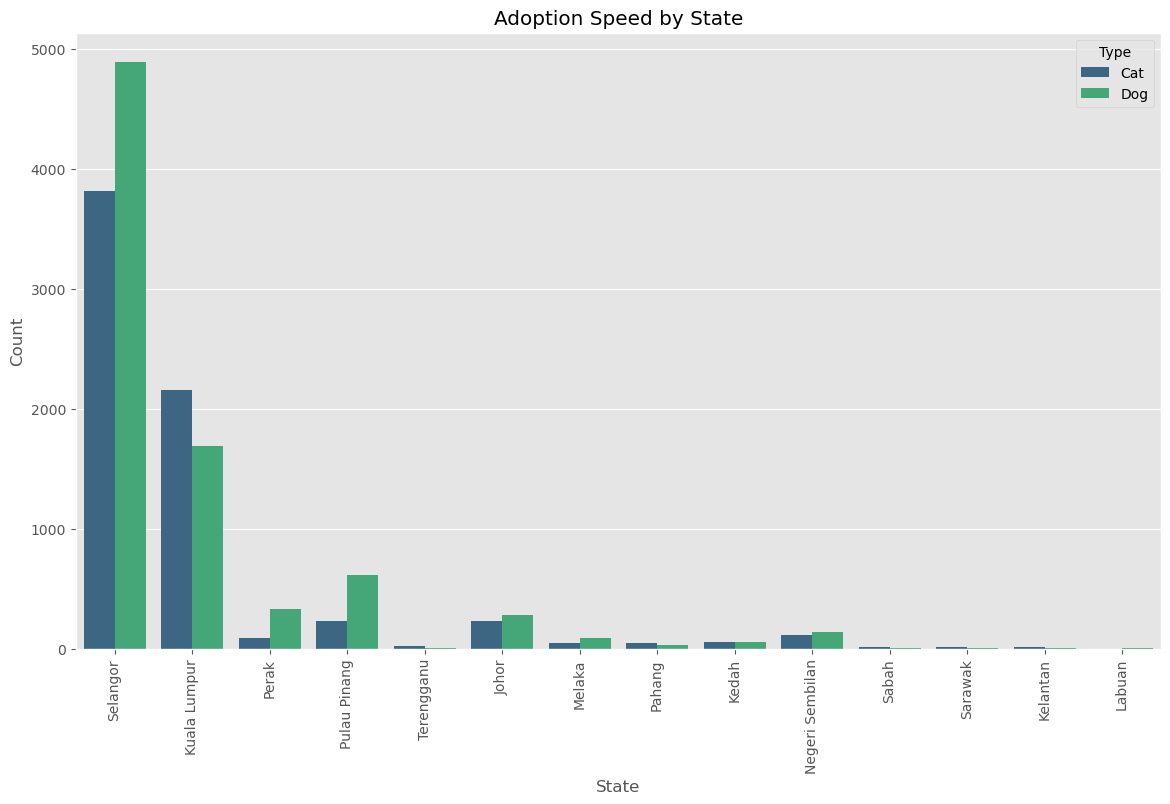

In [23]:

# Merge df with states to get state names
df = df.merge(states, left_on='State', right_on='StateID', how='left', suffixes=('', '_y'))

# Drop the duplicate columns created by the merge
df.drop(['StateID_y', 'StateName_y'], axis=1, inplace=True)

# Map Type to 'Dog' and 'Cat'
df['Type'] = df['Type'].map({1: 'Dog', 2: 'Cat'})

# Adoption Speed by State
plt.figure(figsize=(14, 8))
sns.countplot(x='StateName', hue='Type', data=df, palette='viridis')
plt.title('Adoption Speed by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Kuala Lumpur has a noticable preference for cats, unlike most other states. 

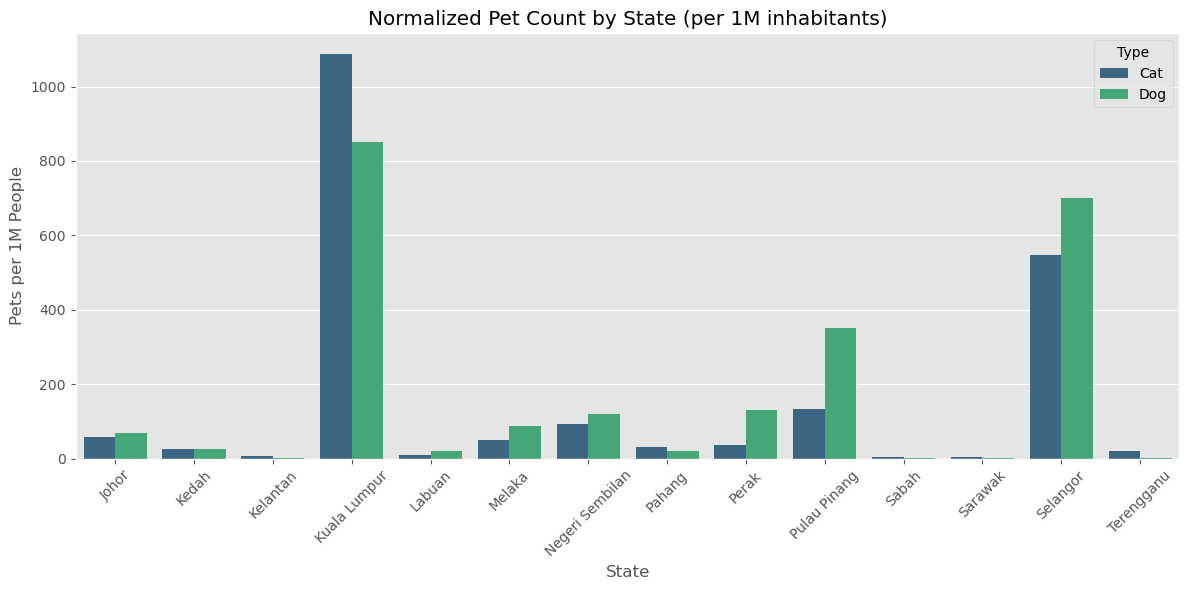

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------------------
# Drop existing StateID and StateName columns to avoid conflicts
df.drop(['StateID', 'StateName'], axis=1, inplace=True)

df = df.merge(states, left_on='State', right_on='StateID', how='left')

# ---------------------------------------------------------
population_data = {
    "Johor": 4009670,
    "Kedah": 2131427,
    "Kelantan": 1792501,
    "Kuala Lumpur": 1982112,  # Also sometimes 'FT Kuala Lumpur'
    "Labuan": 95120,
    "Melaka": 998428,         # Instead of "Malacca"
    "Negeri Sembilan": 1199974,
    "Pahang": 1591295,
    "Perak": 2496041,
    "Perlis": 284885,
    "Pulau Pinang": 1740405,  # Also "Penang" if needed
    "Sabah": 3418785,
    "Sarawak": 2453677,
    "Selangor": 6994423,
    "Terengganu": 1149440
}


grouped = df.groupby(["StateName", "Type"]).size().reset_index(name="count")


# ---------------------------------------------------------
grouped["Population"] = grouped["StateName"].map(population_data)

# Example: number of pets per 1,000,000 people
grouped["Pets_per_million"] = (grouped["count"] / grouped["Population"]) * 1_000_000

# Check for any states that didn’t match in population_data
missing_states = grouped[grouped["Population"].isnull()]["StateName"].unique()
if len(missing_states) > 0:
    print("WARNING: The following states have no population data:", missing_states)


# ---------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x="StateName", y="Pets_per_million", hue="Type", data=grouped, palette="viridis")

plt.title("Normalized Pet Count by State (per 1M inhabitants)")
plt.xlabel("State")
plt.ylabel("Pets per 1M People")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


When normalised per habitants in the state (info taken from wikipedia https://en.wikipedia.org/w/index.php?title=Demographics_of_Malaysia&oldformat=true#Ethnolinguistic_groups) the three states are remain the same. Different adoptions may be due to unknown biases like muslim. 

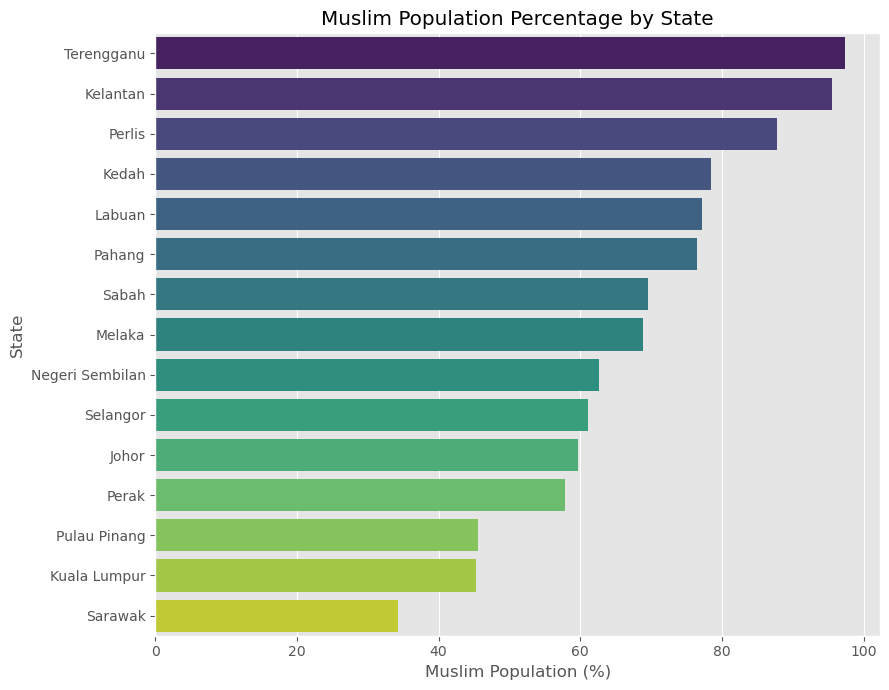

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dictionary of Muslim population (%) keyed by StateName
muslim_data = {
    "Johor": 59.7,
    "Kedah": 78.5,
    "Kelantan": 95.5,
    "Kuala Lumpur": 45.3,
    "Labuan": 77.2,
    "Melaka": 68.9,
    "Negeri Sembilan": 62.6,
    "Pahang": 76.5,
    "Perak": 57.9,
    "Perlis": 87.8,
    "Pulau Pinang": 45.5,
    "Sabah": 69.6,
    "Sarawak": 34.2,
    "Selangor": 61.1,
    "Terengganu": 97.3
}

# 2. Convert the dictionary to a pandas DataFrame
df_muslim = pd.DataFrame(
    list(muslim_data.items()), 
    columns=["StateName", "Muslim_Percent"]
)

# 3. Sort by percentage (optional, here descending)
df_muslim.sort_values("Muslim_Percent", ascending=False, inplace=True)

# 4. Create a horizontal barplot
plt.figure(figsize=(9, 7))

ax = sns.barplot(
    x="Muslim_Percent", 
    y="StateName", 
    data=df_muslim, 
    palette="viridis"
)

plt.title("Muslim Population Percentage by State")
plt.xlabel("Muslim Population (%)")
plt.ylabel("State")

# 5. Position the percentage text *inside* each bar at the center
for p in ax.patches:
    # X-position: half of the bar length
    x_center = p.get_width() / 2

    # Label for the bar
    label_text = f"{p.get_width():.1f}%"



# 6. Adjust the x-axis limit so labels are not cut off
max_percent = df_muslim["Muslim_Percent"].max()
plt.xlim(0, max_percent + 5)

plt.tight_layout()
plt.show()


States with less muslim population seems to compose the higher adoption States.

In [119]:
# Merge the main dataframe with the breeds dataframe to get breed names
df_breeds = df.merge(breeds, left_on='Breed1', right_on='BreedID', how='left')

# Calculate the average AdoptionSpeed for each breed
breed_adoption_speed = df_breeds.groupby('BreedName')['AdoptionSpeed'].mean().reset_index()

# Sort the breeds by average AdoptionSpeed in ascending order
breed_adoption_speed_sorted = breed_adoption_speed.sort_values(by='AdoptionSpeed')

# Display the breeds with the lowest average AdoptionSpeed
print(breed_adoption_speed_sorted.head(10))

                 BreedName  AdoptionSpeed
43     Chinese Crested Dog       0.000000
151  Sphynx (hairless cat)       0.000000
123             Ragamuffin       1.000000
93                  Kuvasz       1.000000
70                Foxhound       1.000000
114               Papillon       1.000000
59          Dutch Shepherd       1.000000
45               Chow Chow       1.000000
130          Saint Bernard       1.200000
80               Himalayan       1.333333


## 0.3. Preprocessing Data

Preprocessing is a crucial phase in any machine learning project. It involves transforming raw data into a clean and structured format suitable for analysis and modeling. It has the finality of making data consistent, free from errors, and appropriately formatted, all this through **feature engineering** and transformation.

### 1. Library Imports and Configurations

First, we import all necessary libraries required for data manipulation, visualization, and preprocessing. Additionally, we configure pandas to treat infinite values as missing to prevent errors during transformations.

In [135]:
# Import necessary libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import spacy
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect, DetectorFactory
from tqdm import tqdm
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

# Configure pandas to treat infinity as NaN
pd.set_option("use_inf_as_na", True)


### 2. Data Loading and Merging

Next, we loaded the main dataset (`PetFinder_dataset.csv`) and its auxiliary datasets containing breed labels, color labels, and state labels are loaded. These auxiliary files provide mappings between IDs and their corresponding descriptive labels of categorical features. They were later merged through **One-Hot Encoding**.

Additionally, reasoning the state dynamics visualised before, the **socioeconomic data** of state GDP and population figures are incorporated by mapping state-specific IDs to their GDP and population values to enrich the dataset and potentially help certain biases. Also a new feature, gdp_vs_population, is created to capture the relationship between GDP and population for each state, offering a nuanced socioeconomic indicator that could influence pet adoption patterns.

In [70]:
# Load auxiliary CSV files
breeds = pd.read_csv("data/raw/breed_labels.csv")
colors = pd.read_csv("data/raw/color_labels.csv")
states = pd.read_csv("data/raw/state_labels.csv")

# Load the main PetFinder dataset
df = pd.read_csv("data/raw/PetFinder_dataset.csv")

# Load or define state GDP & population for merging
state_gdp = {
    41336: 116.679,
    41325: 40.596,
    41367: 23.02,
    41401: 190.075,
    41415: 5.984,
    41324: 37.274,
    41332: 42.389,
    41335: 52.452,
    41330: 67.629,
    41380: 5.642,
    41327: 81.284,
    41345: 80.167,
    41342: 121.414,
    41326: 280.698,
    41361: 32.270
}

state_population = {
    41336: 33.48283,
    41325: 19.47651,
    41367: 15.39601,
    41401: 16.74621,
    41415: 0.86908,
    41324: 8.21110,
    41332: 10.21064,
    41335: 15.00817,
    41330: 23.52743,
    41380: 2.31541,
    41327: 15.61383,
    41345: 32.06742,
    41342: 24.71140,
    41326: 54.62141,
    41361: 10.35977
}

# Map state GDP and population into the DataFrame
if "State" in df.columns:
    df["state_gdp"] = df["State"].map(state_gdp)
    df["state_population"] = df["State"].map(state_population)
    df["gdp_vs_population"] = df["state_gdp"] / df["state_population"]

- State GDP and Population: We define dictionaries for state GDP and population based on state IDs (got name in their `.csv`). These metrics provide additional socioeconomic context that may influence adoption speed. (https://en.wikipedia.org/wiki/List_of_Malaysian_states_by_GDP)

- Mapping Data: We map the State column in the main dataset to state_gdp and state_population, and compute a new feature gdp_vs_population to capture the relationship between GDP and population for each state.

### 3. Textual Feature

The `Description` feature is textual, making it challenging to use directly. However, it contains valuable information that could improve the accuracy of category predictions in machine learning models. This section focuses on cleaning the textual data and engineering features two feature types to hopefully increase the dataset's predictive power.

The cleaning process involves several steps: **handling punctuation** by inserting spaces around punctuation marks to facilitate accurate tokenization, **correcting common misspellings and contractions** using a predefined dictionary, and **standardizing numerical representations** by replacing numbers with hash symbols based on their length.**Extraneous characters** are removed to reduce noise, and multiple consecutive spaces are condensed into single spaces for consistency. **Lemmatization** is performed using spaCy to reduce words to their base forms, ensuring that different forms of the same word are treated uniformly.

This cleaning process results in a `Description_cleaned` column that is free from irrelevant characters, standardized in form, and ready for further analysis such as **sentiment scoring** and **embedding generation**.

In [73]:
# Ensure reproducibility in language detection
DetectorFactory.seed = 0
import re
from nltk.stem import PorterStemmer 
import spacy

# Download VADER lexicon
nltk.download('vader_lexicon')


# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


# Load spaCy model (ensure you've downloaded 'en_core_web_md' or 'en_core_web_lg')
nlp = spacy.load('en_core_web_md')

# Define punctuations and misspellings
puncts = [
    '。', ',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', 
    '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•', '~', '_', '{', '}', 
    '^', '`', '<', '°', '™', '♥', '½', '…', '“', '”', '–', '●', '²', '¬', '↑',
    '—', '：', '’', '☆', 'é', '¯', '♦', '‘', '）', '↓', '、', '（', '，', '♪', 
    '³', '❤', 'ï', '√'
]

mispell_dict = {
    "I'd": 'I would',
    "I'll": 'I will',
    "I'm": 'I am',
    "I've": 'I have',
    "ain't": 'is not',
    "aren't": 'are not',
    "can't": 'cannot',
    'cancelled': 'canceled',
    'centre': 'center',
    'colour': 'color',
    "could've": 'could have',
    "couldn't": 'could not',
    "didn't": 'did not',
    "doesn't": 'does not',
    "don't": 'do not',
    'enxiety': 'anxiety',
    'favourite': 'favorite',
    "hadn't": 'had not',
    "hasn't": 'has not',
    "haven't": 'have not',
    "he'd": 'he would',
    "he'll": 'he will',
    "he's": 'he is',
    "here's": 'here is',
    "how's": 'how is',
    "i'd": 'i would',
    "i'll": 'i will',
    "i'm": 'i am',
    "i've": 'i have',
    "isn't": 'is not',
    "it'll": 'it will',
    "it's": 'it is',
    'labour': 'labor',
    "let's": 'let us',
    "might've": 'might have',
    "must've": 'must have',
    'organisation': 'organization',
    "she'd": 'she would',
    "she'll": 'she will',
    "she's": 'she is',
    "shouldn't": 'should not',
    "that's": 'that is',
    'theatre': 'theater',
    "there's": 'there is',
    "they'd": 'they would',
    "they'll": 'they will',
    "they're": 'they are',
    "they've": 'they have',
    'travelling': 'traveling',
    "wasn't": 'was not',
    'watsapp': 'whatsapp',
    "we'd": 'we would',
    "we'll": 'we will',
    "we're": 'we are',
    "we've": 'we have',
    "weren't": 'were not',
    "what's": 'what is',
    "where's": 'where is',
    "who'll": 'who will',
    "who's": 'who is',
    "who've": 'who have',
    "won't": 'will not',
    "would've": 'would have',
    "wouldn't": 'would not',
    "you'd": 'you would',
    "you'll": 'you will',
    "you're": 'you are',
    "you've": 'you have',
    '，': ',',
    '／': '/',
    '？': '?'
}

import re
from collections import defaultdict

def clean_text(x):
    x = str(x)
    for p in puncts:
        x = x.replace(p, f" {p} ")
    return x

def clean_numbers(x):
    x = re.sub(r'\b\d{5,}\b', '#####', x)
    x = re.sub(r'\b\d{4}\b', '####', x)
    x = re.sub(r'\b\d{3}\b', '###', x)
    x = re.sub(r'\b\d{2}\b', '##', x)
    return x

def _get_mispell(mispell_dict):
    # Build a regex pattern for misspellings
    pattern = '|'.join([re.escape(key) for key in mispell_dict.keys()])
    mispell_re = re.compile(r'\b(' + pattern + r')\b', re.IGNORECASE)
    return mispell_dict, mispell_re

mispellings, mispellings_re = _get_mispell(mispell_dict)

def replace_typical_misspell(text):
    def replace(match):
        word = match.group(0)
        # Preserve the case of the first character
        first_char = word[0]
        replacement = mispellings.get(word.lower(), word)
        return replacement.capitalize() if first_char.isupper() else replacement
    return mispellings_re.sub(replace, text)

def process_text_advanced(txt):
    # Combine cleaning steps
    txt = clean_text(str(txt))
    txt = replace_typical_misspell(txt)
    txt = clean_numbers(txt)
    # Remove extraneous characters
    for c in '()*,./:;\\\t\n':
        txt = txt.replace(c, '')
    # Reduce multiple spaces to single space
    txt = re.sub(r'\s+', ' ', txt)
    # Lemmatize using spaCy
    doc = nlp(txt)
    txt = ' '.join([token.lemma_ for token in doc])
    return txt.strip()




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


- Downloading the **VADER** (Valence Aware Dictionary and Sentiment Reasoner) sentiment lexicon is essential for sentiment analysis.

- Loading the medium-sized English **spaCy** model (en_core_web_md) provides robust word embeddings for text processing tasks. 


We implement this in the section ahead.

### 3. Handling Missing Values, Erros and Typos - Textual Features

We identify and address missing values in the dataset, specifically in the `Name` and `Description` columns. Additionally, we converted `Name` textual categorical data into Binary numerical formats suitable for machine learning models.

#### a. Visualize Missing Data

Using the `missingno` library, missing values are visualized to identify patterns and the extent of *missingness* across different columns. In this dataset, significant *missingness* is observed in the `Name` column, with over 8% of entries missing, while the `Description` column has a minimal amount of missing data. 

<Figure size 600x200 with 0 Axes>

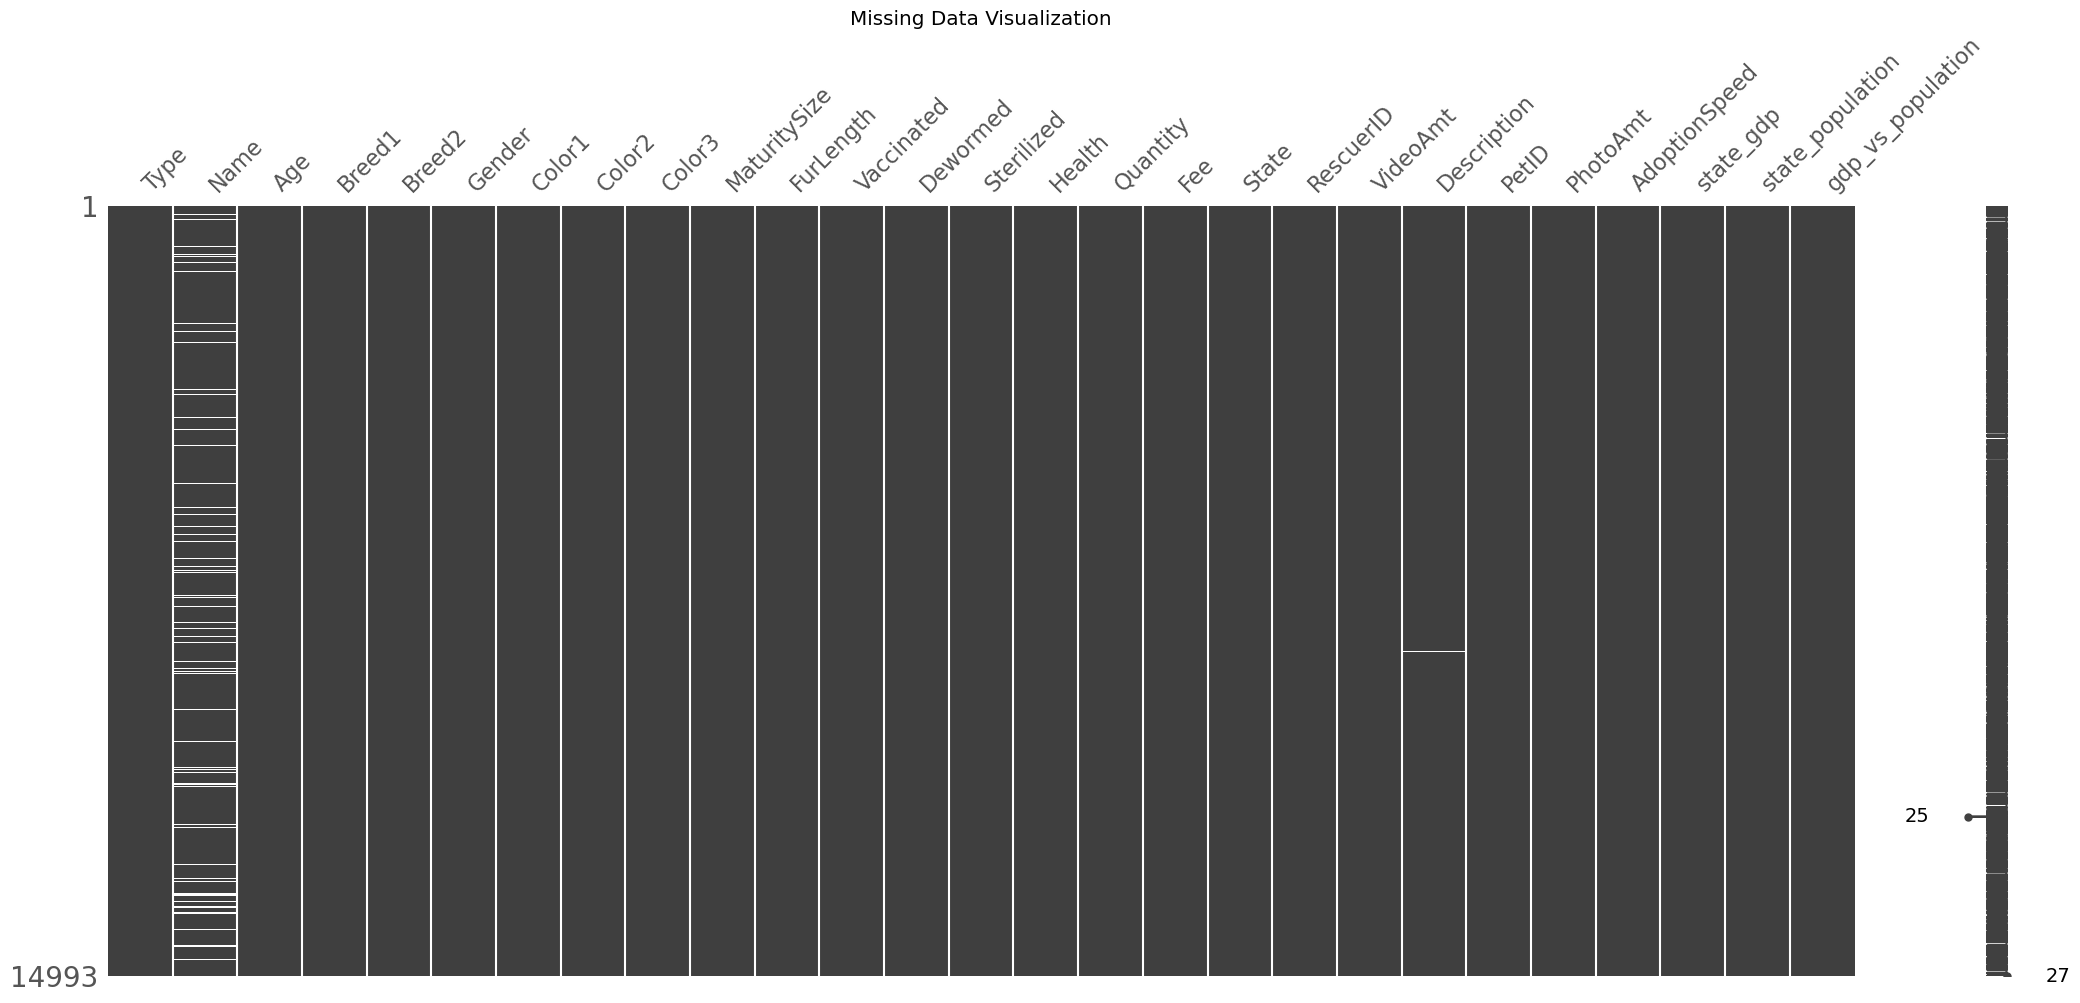

Missing data summary:
          Column  Missing Values  Percentage
1          Name            1265    8.437271
20  Description              13    0.086707


In [74]:
import missingno as msno

# 1. Visualize missing data
plt.figure(figsize=(6, 2))
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()

# 2. Summarize missing data
missing_data_summary = df.isnull().sum().reset_index()
missing_data_summary.columns = ['Column', 'Missing Values']
missing_data_summary['Percentage'] = (missing_data_summary['Missing Values'] / len(df)) * 100
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]
missing_data_summary = missing_data_summary.sort_values(by='Missing Values', ascending=False)

print("Missing data summary:\n", missing_data_summary)


#### b. Transforming Textual Features

To handle this, missing `Description`entries are filled with empty strings to prevent errors during text processing. The Prior explained transformation is done to the text, producing `Description_cleaned` column. After these transformations, the original `Description` column is dropped.

The `Name` column, which contains textual data indicating whether a **pet has a name**, is converted into a **binary feature**. Entries like "no name," "unnamed," or "not named" are encoded as 0, representing the absence of a meaningful name, while valid names are encoded as 1. This binary encoding simplifies the feature, reducing dimensionality and makes it less prone to overfit the model. 

In [75]:
# Fill missing descriptions with empty string
if "Description" in df.columns:
    df["Description"].fillna("", inplace=True)
    # Apply dynamic cleaning to each description with progress bar
    tqdm.pandas()
    df["Description_cleaned"] = df["Description"].progress_apply(process_text_advanced)

# Process the 'Name' column into a binary feature
if "Name" in df.columns:
    invalid_names = ["no name", "no name yet", "unnamed", "not named"]
    df["Name"] = df["Name"].apply(
        lambda x: 0 if pd.isnull(x) or str(x).strip().lower() in invalid_names else 1
    )
    
# Drop the original 'Description' column
df.drop(columns=["Description"], inplace=True)


  5%|▌         | 777/14993 [00:08<02:39, 89.03it/s] 


KeyboardInterrupt: 

Seeing how `Description` cleaning was somewhat slow, we quickly saved the data frame to a `.csv` file to save time on reruns on further preprocessing-

In [109]:
# Save the processed DataFrame to a CSV file
# skip_path = 'data/processed/skip_processed.csv'
# df.to_csv(skip_path, index=False)

In [229]:
df = pd.read_csv('data/processed/skip_processed.csv')

### 5.  Features Removal and Creation

To optimize modeling, certain features that do not contribute meaningful information and could potentially introduce noise should be removed. The `PetID` column, being a unique identifier, does not provide predictive value and is thus dropped.

In [230]:
drop_cols = ["PetID"]
for col in drop_cols:
    if col in df.columns:
        df.drop(columns=[col], inplace=True, errors="ignore")


To improve the dataset's predictive power and minimize dimensionality issues, new features are engineered to capture key factors that may influence adoption speed. For instance, the feature `IsFree` is introduced to indicate whether a pet is being offered for adoption free of charge.

Another challenge was the high dimensionality of pet breeds, with over 300 breeds combined in the `Breed1` and `Breed2` columns. To address this, a new feature, `Pure_Breed`, is derived to differentiate between purebred and mixed-breed pets. This is accomplished by analyzing the `Breed1` and `Breed2` columns, ensuring that pets with only a single breed entry and no indication of being mixed are labeled as purebred. This engineered feature simplifies the dataset and reduces potential issues in subsequent analysis.

`Breed1` and `Breed2` were dropped, while `Fee` was kept and later normalized.


In [231]:
# Load the breed labels CSV file
breed_labels = pd.read_csv("data/raw/breed_labels.csv")

# Define pure_breeds_df
pure_breeds_df = df[((df['Breed2'] == 0) | (df['Breed2'].isnull())) & (~df['Breed1'].isin(breed_labels[breed_labels['BreedName'].str.contains('mixed', case=False)]['BreedID']))]

# Calculate the percentage of pure breed and non-pure breed entries
total_entries = len(df)
pure_breed_entries = len(pure_breeds_df)
non_pure_breed_entries = total_entries - pure_breed_entries

pure_breed_percentage = (pure_breed_entries / total_entries) * 100
non_pure_breed_percentage = (non_pure_breed_entries / total_entries) * 100

print(f"Percentage of Pure Breed Entries: {pure_breed_percentage:.2f}%")
print(f"Percentage of Non-Pure Breed Entries: {non_pure_breed_percentage:.2f}%")


Percentage of Pure Breed Entries: 41.53%
Percentage of Non-Pure Breed Entries: 58.47%


In [232]:
df["IsFree"] = (df["Fee"] == 0).astype(int)


if "Breed2" in df.columns:
    df["Pure_Breed"] = df.apply(lambda x: 0 if x["Breed2"] != 0 or "mixed" in str(breeds[breeds['BreedID'] == x["Breed1"]]['BreedName'].values).lower() or "mixed" in str(breeds[breeds['BreedID'] == x["Breed2"]]['BreedName'].values).lower() else 1, axis=1)
    if "Breed1" in df.columns:
        df.drop(columns=["Breed1", "Breed2"], inplace=True)

### 6. Sentiment Analysis and Language Detection

As previously stated, textual descriptions of pets contain rich information that can influence adoption decisions. To quantify this, **sentiment analysis** is performed using **VADER's** `SentimentIntensityAnalyzer`. 

This assigns a compound sentiment score to each pet's description, ranging from -1 (most negative) to +1 (most positive). These scores are stored in a new column, `SentimentScore`, providing a numerical representation of the emotional tone conveyed in the descriptions. This scores can be easily applied in most models.

In [233]:
def analyze_sentiment_vader(text):
    """
    Analyze sentiment using VADER and return the compound score.
    """
    if not text or pd.isnull(text):
        return 0.0  # Neutral sentiment for empty or null descriptions
    
    text = str(text)  # Ensure the text is a string
    try:
        scores = sid.polarity_scores(text)
        compound = scores['compound']  # Compound score ranges from -1 to +1
        return compound
    except Exception as e:
        print(f"Error processing text: {e}")
        return 0.0  # Neutral sentiment on error

# Apply sentiment analysis with progress bar
tqdm.pandas()
df['SentimentScore'] = df['Description_cleaned'].progress_apply(analyze_sentiment_vader)


100%|██████████| 14993/14993 [00:08<00:00, 1751.24it/s]


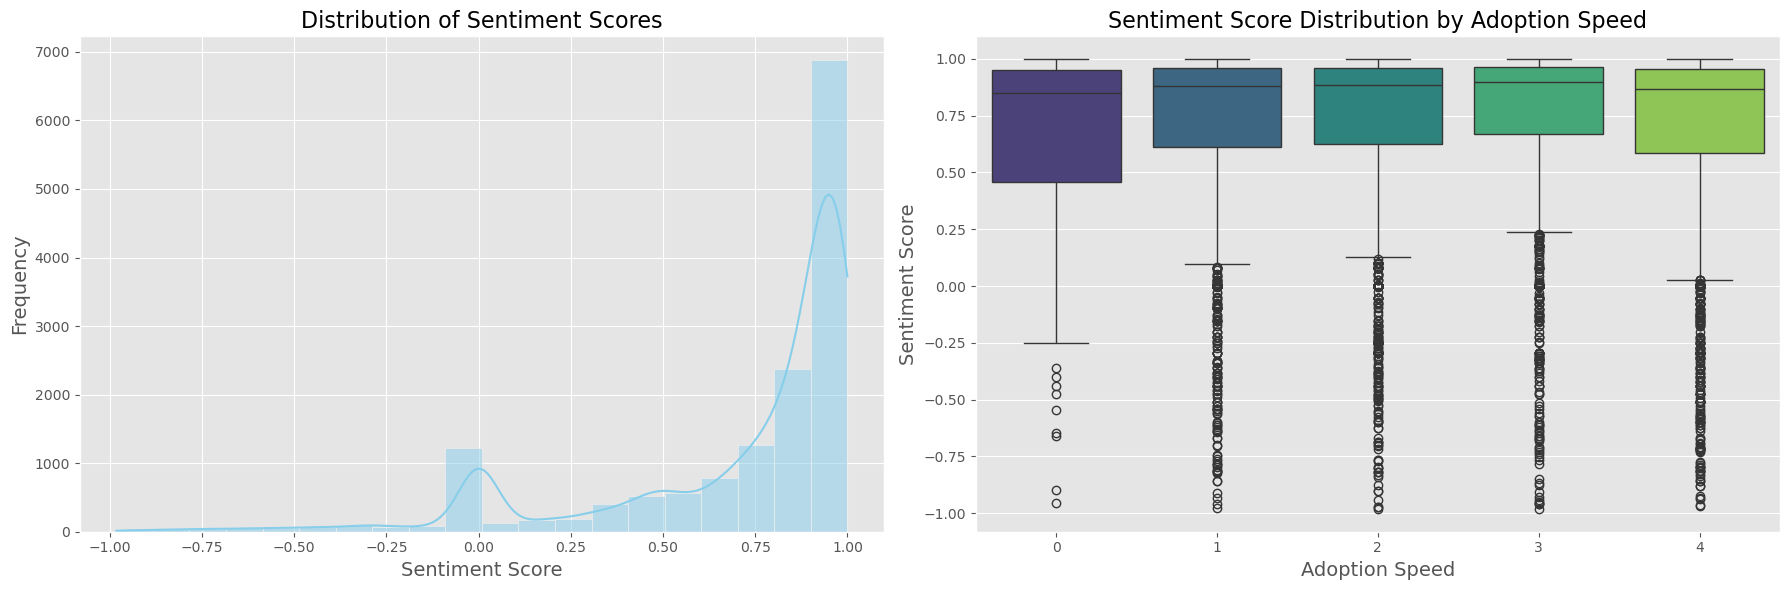

In [234]:
# Create a figure with 3 subplots arranged in a single row
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Distribution of Sentiment Scores
sns.histplot(df['SentimentScore'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Sentiment Scores', fontsize=16)
axes[0].set_xlabel('Sentiment Score', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Subplot 2: Sentiment Scores vs. Adoption Speed
sns.boxplot(x='AdoptionSpeed', y='SentimentScore', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Sentiment Score Distribution by Adoption Speed', fontsize=16)
axes[1].set_xlabel('Adoption Speed', fontsize=14)
axes[1].set_ylabel('Sentiment Score', fontsize=14)


# Adjust layout
plt.tight_layout()
plt.show()


Sentiment scores are mostly positive. This can cause issues in the modelling so some changes have to be made to normalize this.

#### 7. Word Embeddings With GloVe

However, sentiment analysis can sometimes be **limited in capturing the full context and nuances of textual data** by transforming all that info into a single score. Word embeddings might be better than sentiment analysis in some cases because they capture the context and semantic meaning of words, rather than just their emotional tone. This allows the capture of relationships between words and phrases that can be better at identifying unseen relations. For instance, embeddings can help identify "not good" and "good," which sentiment analysis might struggle with. 

**Essentially, embeddings can capture nuances of context-specific meanings that sentiment analysis might miss.**

To better capture the semantic relationships within the textual descriptions, word embeddings are employed using the **GloVe** (Global Vectors for Word Representation) algorithm. GloVe embeddings convert words into numerical vectors that encapsulate their meanings based on their co-occurrence. 

In this project, a **50-dimensional GloVe embedding** (pre-made and not associate to adoption speed) is loaded and used to transform each cleaned description into an embedding vector. This transformation involves splitting each description into individual words, retrieving their corresponding embedding vectors, and averaging these vectors to obtain a single fixed-size vector representing the entire description. 

These embedding vectors can then be expanded into separate columns/ features (`Embedding_0` to `Embedding_49`) within the dataset, allowing machine learning models to utilize the rich semantic information they contain.


**Unfortunately, these features introduce high dimensionality (and noise) into the data set, which does not work well with all models (better in deep learning and linear models).**


#### a. GloVe Embedding Vector

In [235]:
import numpy as np

# Load GloVe embeddings into a dictionary
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Load the GloVe embeddings (adjust the path to your GloVe file)
glove_file_path = 'data/raw/glove.6B.50d.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)

# Create a function to convert text into embedding vectors
def text_to_embedding(text, embeddings_index, embedding_dim=50):
    if not isinstance(text, str):
        text = ""
    words = text.split()
    embedding_matrix = np.zeros((len(words), embedding_dim))
    for i, word in enumerate(words):
        embedding_vector = embeddings_index.get(word.lower())
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return np.mean(embedding_matrix, axis=0)

# Step 4: Apply the function to the Description_cleaned column
df['Description_embedding'] = df['Description_cleaned'].apply(lambda x: text_to_embedding(x, glove_embeddings))

# Display the first few rows of the DataFrame with the new embedding column
df

,Type,Name,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,...,PhotoAmt,AdoptionSpeed,state_gdp,state_population,gdp_vs_population,Description_cleaned,IsFree,Pure_Breed,SentimentScore,Description_embedding
0,2,1,3,1,1,7,0,1,1,2,...,1.0,2,280.698,54.62141,5.138974,Nibble be a 3 + month old ball of cuteness he ...,0,1,0.9568,"[0.4196904151596957, 0.10800619543281048, -0.0..."
1,2,0,1,1,1,2,0,2,2,3,...,2.0,0,190.075,16.74621,11.350329,I just find it alone yesterday near my apartme...,1,1,0.1280,"[0.5540603378220744, 0.05409047882194105, 0.17..."
2,1,1,1,1,2,7,0,2,2,1,...,7.0,3,280.698,54.62141,5.138974,their pregnant mother be dump by her irrespons...,1,0,0.7717,"[0.367637420370095, 0.012736465403999107, -0.0..."
3,1,1,4,2,1,2,0,2,1,1,...,8.0,2,190.075,16.74621,11.350329,good guard dog very alert active obedience wai...,0,0,0.9509,"[0.11029705838990156, 0.1354023547394684, 0.03..."
4,1,1,1,1,1,0,0,2,1,2,...,3.0,2,280.698,54.62141,5.138974,this handsome yet cute boy be up for adoption ...,1,0,0.9885,"[0.28966678659443135, 0.135583574872142, -0.12..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,0,2,3,1,0,0,2,2,2,...,3.0,2,280.698,54.62141,5.138974,I have 4 kitten that need to be adopt urgently...,1,1,0.9297,"[0.3105251949602439, 0.0717080531301937, -0.00..."
14989,2,1,60,3,1,4,7,2,2,1,...,3.0,4,280.698,54.62141,5.138974,Serato female cat - 3 color be 4 year old and ...,1,0,0.5994,"[0.10806516218125015, 0.37907160133928863, 0.1..."
14990,2,1,2,3,5,6,7,3,2,2,...,5.0,3,280.698,54.62141,5.138974,mix breed good temperament kitten Love human v...,0,0,0.8908,"[-0.07413555764489704, 0.17740607101263273, -0..."
14991,2,1,9,2,4,7,0,1,1,1,...,3.0,4,116.679,33.48283,3.484741,she be very shy adventure and independent she ...,1,1,0.9078,"[0.24970990656451744, 0.26729955816302786, -0...."


#### b. Inserting Different Embedding Columns

In [236]:
# Assuming df['Description_embedding'] contains the embedding vectors
embedding_dim = len(df['Description_embedding'].iloc[0])  # Get the dimension of the embedding

# Create separate columns for each dimension of the embedding
for i in range(embedding_dim):
    df[f'Embedding_{i}'] = df['Description_embedding'].apply(lambda x: x[i])

# Drop the original 'Description_embedding' column as it's no longer needed
df.drop(columns=['Description_embedding'], inplace=True)

# Display the updated DataFrame
df.head()

,Type,Name,Age,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,...,Embedding_40,Embedding_41,Embedding_42,Embedding_43,Embedding_44,Embedding_45,Embedding_46,Embedding_47,Embedding_48,Embedding_49
0,2,1,3,1,1,7,0,1,1,2,...,-0.209117,0.071536,0.039673,0.271959,0.040747,-0.011966,-0.110765,-0.101373,0.022826,0.131857
1,2,0,1,1,1,2,0,2,2,3,...,-0.235693,0.007400,0.063894,0.277781,-0.090579,0.136280,-0.184534,-0.176186,-0.052162,0.169302
2,1,1,1,1,2,7,0,2,2,1,...,-0.153518,-0.008442,0.077309,0.184196,0.140820,-0.015836,-0.177370,-0.160411,0.083405,0.024215
3,1,1,4,2,1,2,0,2,1,1,...,0.064712,-0.011207,-0.015421,0.307498,0.192495,-0.066642,0.048094,-0.032078,0.062428,0.481625
4,1,1,1,1,1,0,0,2,1,2,...,-0.183666,0.064552,-0.098133,0.202527,0.102434,0.005503,-0.083902,-0.109779,0.015897,0.209886


### 8. Defining Numerical and Categorical Features

Apart from `xIDs`, `Name`, and `Description`, our dataset primarily consisted of '*numbers*'. However, most of these represented indexes for categorical features. Planning to use these numbers as their values would be completely unreliable, as they lack inherent order or numerical significance. For instance, the `Health` feature (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified) does not imply that a value of 1 is inherently less than 3. Therefore, these features require preprocessing.

Similarly, most numeric features (as observed during data exploration) exhibit a right-skewed distribution and need normalization. On the other hand, the `SentimentScore` feature shows a left-skewed distribution.

To streamline preprocessing, features are categorized into numerical and categorical types:

- **Numerical features** include continuous variables such as `Age`, `Fee`, as well as the embedding dimensions.
- **Categorical features** include variables such as `Type`, `Gender`, and various color indicators. 


In [237]:
# Define numerical and categorical features
all_num_features = [
    "Age", "Quantity", "Fee", "VideoAmt", "PhotoAmt", 'state_gdp', 
    'state_population', 'gdp_vs_population', 'SentimentScore'
] + [f'Embedding_{i}' for i in range(50)]

all_cat_features = [
    "Type", "Gender", "Color1", "Color2", "Color3", "Name", 
    "IsFree", "Vaccinated", "Dewormed", "Sterilized", 
    "State", "RescuerID", "Pure_Breed", "MaturitySize", "FurLength", "Health"
]

# Fill missing numerical values with -1, even though it was not necessary
for col in all_num_features:
    if col in df.columns:
        df[col].fillna(-1, inplace=True)


- `all_num_features`: Lists features with numerical values, which will be subject to scaling and transformation.

- `all_cat_features`: Lists features with categorical values, which will be encoded into numerical formats suitable for modeling.

#### 9. One-Hot Encoding

Categorical variables are transformed into numerical representations through one-hot encoding, a technique that converts each category within a feature into separate binary columns. This method is particularly effective for features with a manageable number of unique categories, such as `Type`, `Gender`, and color indicators. 

High-cardinality features, like `RescuerID`, are excluded from this process to avoid an explosion in the number of features, which could lead to increased computational complexity and a heightened risk of overfitting. 

The one-hot encoding process involves fitting a `OneHotEncoder` to the selected categorical features and transforming them into binary columns while dropping the first category to avoid multicollinearity. The encoded features are then concatenated with the original dataset, replacing the original categorical columns.

Essentially, this transformation ensures that categorical variables are represented in a format that interpret, making models able to use categorical features without assuming any inherent ordinal relationships.

In [238]:
# Filter out rows where Type and Gender is 3
df = df[df['Type'].isin([1, 2])]

from sklearn.preprocessing import OneHotEncoder

# Identify categorical features to one-hot encode
# Exclude high-cardinality features like 'RescuerID'
onehot_features = [
    'Type', 'Gender', 'Color1', 'Color2', 'Color3', 
    'Vaccinated', 'Dewormed', 'Sterilized', 'State'
]

# Initialize OneHotEncoder
# drop='first' avoids the dummy variable trap by removing the first category
# sparse=False returns a dense array
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Fit and transform the specified categorical features
encoded_features = encoder.fit_transform(df[onehot_features])

# Retrieve the new feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(onehot_features)

# Define mappings for categorical features
state_labels = states.set_index('StateID')['StateName'].to_dict()
color_labels = colors.set_index('ColorID')['ColorName'].to_dict()
gender_labels = {1: 'Male', 2: 'Female', 3: 'Mixed_Gender'}
species_labels = {1: 'Dog', 2: 'Cat'}
vaccinated_labels = {1: 'Vaccinated_Yes', 2: 'Vaccinated_No', 3: 'Vaccinated_Not_Sure'}
dewormed_labels = {1: 'Dewormed_Yes', 2: 'Dewormed_No', 3: 'Dewormed_Not_Sure'}
sterilized_labels = {1: 'Sterilized_Yes', 2: 'Sterilized_No', 3: 'Sterilized_Not_Sure'}

# Update the column names for the encoded features
encoded_feature_names = [
    species_labels.get(int(category), category) if feature == 'Type' else
    gender_labels.get(int(category), category) if feature == 'Gender' else
    state_labels.get(int(category), category) if feature == 'State' else
    color_labels.get(int(category), category) if feature in ['Color1', 'Color2', 'Color3'] else
    vaccinated_labels.get(int(category), category) if feature == 'Vaccinated' else
    dewormed_labels.get(int(category), category) if feature == 'Dewormed' else
    sterilized_labels.get(int(category), category) if feature == 'Sterilized' else
    category
    for feature, categories in zip(onehot_features, encoder.categories_)
    for category in categories[1:]  # Skip the first category to avoid the dummy variable trap
]

# Create a DataFrame with the updated encoded feature names
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

# Concatenate the encoded features with the original dataframe
df_encoded = pd.concat([df.drop(columns=onehot_features), encoded_df], axis=1)

# Update numerical and categorical feature lists
all_cat_features = [col for col in all_cat_features if col not in onehot_features]

df_encoded


,Name,Age,MaturitySize,FurLength,Health,Quantity,Fee,RescuerID,VideoAmt,PhotoAmt,...,Perak,Negeri Sembilan,Pahang,Johor,Sarawak,Sabah,Terengganu,Kelantan,Kuala Lumpur,Labuan
0,1,3,1,1,1,1,100,8480853f516546f6cf33aa88cd76c379,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,2,2,1,1,0,3082c7125d8fb66f7dd4bff4192c8b14,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,2,2,1,1,0,fa90fa5b1ee11c86938398b60abc32cb,0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,4,2,1,1,1,150,9238e4f44c71a75282e62f7136c6b240,0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,2,1,1,1,0,95481e953f8aed9ec3d16fc4509537e8,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,0,2,2,2,1,4,0,61c84bd7bcb6fb31d2d480b1bcf9682e,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14989,1,60,2,2,1,2,0,1d5096c4a5e159a3b750c5cfcf6ceabf,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14990,1,2,3,2,1,5,30,6f40a7acfad5cc0bb3e44591ea446c05,0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14991,1,9,1,1,1,1,0,c311c0c569245baa147d91fa4e351ae4,0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 10. Frequency Encoding 

To address high-cardinality categorical features, frequency encoding is applied to the `RescuerID` feature. Instead of creating numerous binary columns, each unique rescuer ID is replaced with the frequency of its occurrence in the dataset. This transformation reduces dimensionality while preserving valuable information about the rescuer's activity level.

A new numerical feature, `RescuerID_freq`, is created to represent these frequencies, and the original `RescuerID` column is subsequently dropped.

**However, care must be taken to avoid potential `target leakage`, ensuring that frequency encoding does not introduce biases that compromise the model's ability to generalize effectively (might overfit model).**


In [241]:
# Frequency encoding for RescuerID
rescuer_freq = df_encoded['RescuerID'].value_counts().to_dict()
df_encoded['RescuerID_freq'] = df['RescuerID'].map(rescuer_freq)

# Drop the original RescuerID column
df_encoded.drop(columns=['RescuerID'], inplace=True)

# Add 'RescuerID_freq' to all_num_features
all_num_features.append('RescuerID_freq')

# Display the updated DataFrame
df_encoded.head()

,Name,Age,MaturitySize,FurLength,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,...,Negeri Sembilan,Pahang,Johor,Sarawak,Sabah,Terengganu,Kelantan,Kuala Lumpur,Labuan,RescuerID_freq
0,1,3,1,1,1,1,100,0,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0,1,2,2,1,1,0,0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,1,1,2,2,1,1,0,0,7.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,459
3,1,4,2,1,1,1,150,0,8.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50
4,1,1,2,1,1,1,0,0,3.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134


#### 11. Numeric Feature Normalization

Scaling numerical features is particularly **important for some models, such as linear regression, logistic regression, and neural networks**. 

While **it is not required for distance-based or tree-based models, such as K-Means Clustering, Support Vector Machines, Decision Trees, and Random Forests,** we still opted to do it.

Numerical features are scaled using the `MinMaxScaler`, which normalizes each feature to a range between 0 and 1. This scaling ensures that all numerical variables contribute equally to the models, preventing features with larger magnitudes from overshadowing those with smaller scales. 

Normalization is essential  for algorithms sensitive to feature magnitudes, such as K-Nearest Neighbors, Support Vector Machines, and Neural Networks. By applying it to numerical features like `Age`, `Fee`, and the embedding dimensions, the dataset is prepared for effective modeling. Essentially, this does improves model performance with faster convergence during training, particularly for gradient-based algorithms. Moreover, it preserves the relationships between feature values, maintaining the integrity of the data structure.


In [242]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical features
df_encoded[all_num_features] = scaler.fit_transform(df_encoded[all_num_features])


In [243]:
'''from sklearn.preprocessing import StandardScaler

# Initialize the scalers
standard_scaler = StandardScaler()

# Scale the numerical features
df_encoded[all_num_features] = standard_scaler.fit_transform(df_encoded[all_num_features])

# Display the updated DataFrame
df_encoded.head()'''

'from sklearn.preprocessing import StandardScaler\n\n# Initialize the scalers\nstandard_scaler = StandardScaler()\n\n# Scale the numerical features\ndf_encoded[all_num_features] = standard_scaler.fit_transform(df_encoded[all_num_features])\n\n# Display the updated DataFrame\ndf_encoded.head()'

#### Final Check

In [252]:
print("Final shape after preprocessing:", df_encoded.shape)
df_encoded.head(5)


Final shape after preprocessing: (14993, 58)


,Name,Age,MaturitySize,FurLength,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,...,Pahang,Johor,Sarawak,Sabah,Terengganu,Kelantan,Kuala Lumpur,Labuan,RescuerID_freq,AdoptedBinary
0,1,0.011765,1,1,1,0.0,0.033333,0.0,0.033333,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015284,1
1,0,0.003922,2,2,1,0.0,0.000000,0.0,0.066667,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1
2,1,0.003922,2,2,1,0.0,0.000000,0.0,0.233333,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1
3,1,0.015686,2,1,1,0.0,0.050000,0.0,0.266667,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.106987,1
4,1,0.003922,2,1,1,0.0,0.000000,0.0,0.100000,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290393,1


In [246]:
df_encoded.rename(columns={'Type_2': 'cat (not dog)'}, inplace=True)

Two datasets were saved to `.cvs` files. One with word embedding and one without.

In [247]:
# List of embedding feature columns
embedding_features = [f'Embedding_{i}' for i in range(50)]

# Create a DataFrame with embedding features
df_with_embedding = df_encoded.copy()

# Create a DataFrame without embedding features
df_without_embedding = df_encoded.drop(columns=embedding_features)


In [248]:
df_with_embedding.to_csv("data/processed/PetFinder_processed_with_embedding.csv", index=False)
df_without_embedding.to_csv("data/processed/PetFinder_processed_WITHOUT_embedding.csv", index=False)

## Task 1 (Supervised Learning) - Predicting Adoption and Adoption Speed

In this task you should target 3 classification tasks:
1. **Predicting  Adoption (binary classification)**: create a new target from AdoptionSpeed that is 1 if AdoptionSpeed <> 4 and 0 otherwise.
2. **Predicting AdoptionSpeed (multiclass classification)**: in this task you should use the original target `AdoptionSpeed`, whose values are in the set {0, 1, 2, 3 , 4} (5 classes). This is a very difficult problem. You might also want to consider 3 classes (for instance {0-1, 2-3, 4}, or other sets that make sense). 
3. **Train specialized models for cats and dogs**: train with cat/dog instances and check whether the classification performance changes/improves when Predicting Adoption and Predicting AdoptionSpeed. 

**You should:**

* Choose **5 classifiers** from **at least 3 of the following categories**: Tree models, Probabilistic models, Distance-based models and Linear models. You can also try one Ensemble Classifier (https://scikit-learn.org/1.5/modules/ensemble.html). 
* Use **cross-validation** to evaluate the results. 
* Present and discuss the results for different evaluation measures, present confusion matrices. Remember that not only overall results are important. Check what happens when learning to predict each class. Remember also that some metrics might be more adequate than others according to the problem at hand.
* Describe the parameters used for each classifier and how their choice impacted or not the results.
* Choose the best classifier and fundament you choice.
* **Discuss critically your choices and the results!**

## 1.1. Specific Data Preprocessing for Classification

Before modeling, it's essential to ensure that our dataset is appropriately prepared. This includes selecting relevant features, encoding categorical variables, handling imbalanced classes, and ensuring that the data is clean and suitable for machine learning algorithms.

Binary Classification:
Training Set: (11994, 52) (11994,)
Testing Set: (2999, 52) (2999,)

Multiclass Classification:
Training Set: (11994, 52) (11994,)
Testing Set: (2999, 52) (2999,)
Before SMOTE: AdoptedBinary
1    8637
0    3357
Name: count, dtype: int64
After SMOTE: AdoptedBinary
0    8637
1    8637
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.49      0.47       840
           1       0.79      0.76      0.77      2159

    accuracy                           0.68      2999
   macro avg       0.62      0.62      0.62      2999
weighted avg       0.69      0.68      0.69      2999



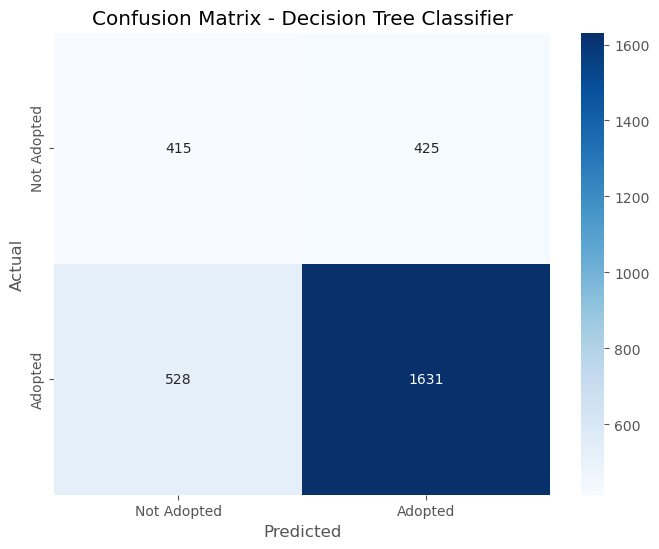

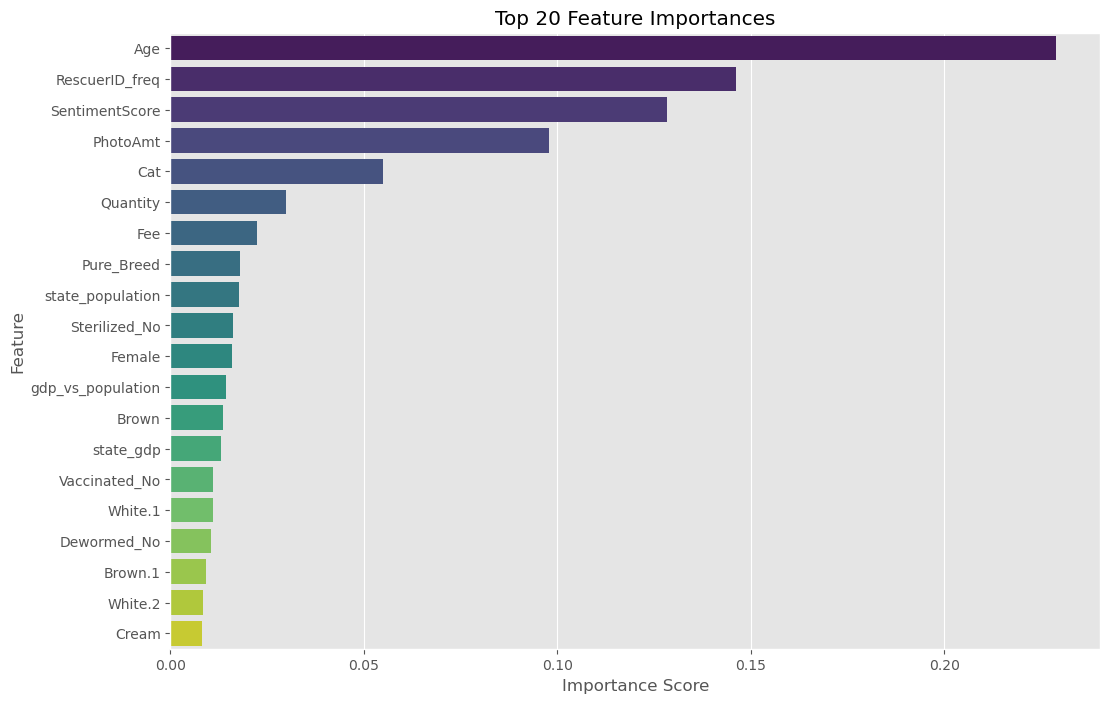

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: 0.7649091097265197
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.49      0.46       840
           1       0.79      0.75      0.77      2159

    accuracy                           0.68      2999
   macro avg       0.61      0.62      0.61      2999
weighted avg       0.69      0.68      0.68      2999



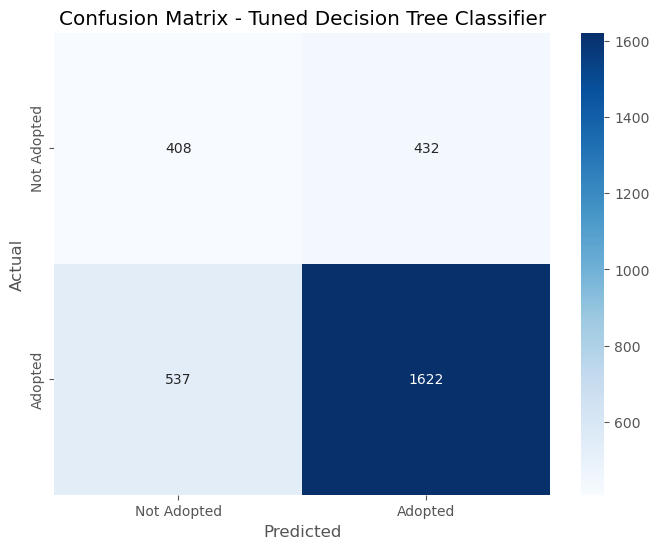

Cross-Validation F1 Scores: [0.77426833 0.77738723 0.77151163 0.7615184  0.75598935]
Mean CV F1 Score: 0.7681 (+/- 0.0081)


In [249]:
# Suppress specific warnings for cleaner outputs
import warnings
warnings.filterwarnings("ignore")

# Essential Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handling Class Imbalance
from imblearn.over_sampling import SMOTE

# Initialize plotting style
plt.style.use('ggplot')
%matplotlib inline

# Load the preprocessed dataset
processed_data_path = 'data/processed/PetFinder_processed_WITHOUT_embedding.csv'
df_encoded = pd.read_csv(processed_data_path)

# Create a new binary target column for predicting adoption
df_encoded['AdoptedBinary'] = df_encoded['AdoptionSpeed'].apply(lambda x: 1 if x != 4 else 0)

# List of features to exclude (identifiers and non-informative columns)
exclude_features = [
    'RescuerID', 'PetID', 'Description', 'Description_cleaned',
    'AdoptionSpeed', 'MaturitySize', 'FurLength', 'Health'
]

# Ensure the columns to drop exist in the DataFrame
exclude_features = [col for col in exclude_features if col in df_encoded.columns]

# Define feature columns for both tasks
feature_columns = [col for col in df_encoded.columns if col not in exclude_features + ['AdoptedBinary']]

# Define the feature matrix X and target vectors y_binary and y_multiclass
X = df_encoded[feature_columns]
y_binary = df_encoded['AdoptedBinary']
y_multiclass = df_encoded['AdoptionSpeed']

# Split the data for binary classification
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Split the data for multiclass classification
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X, y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass
)

print("Binary Classification:")
print("Training Set:", X_train_bin.shape, y_train_bin.shape)
print("Testing Set:", X_test_bin.shape, y_test_bin.shape)

print("\nMulticlass Classification:")
print("Training Set:", X_train_multi.shape, y_train_multi.shape)
print("Testing Set:", X_test_multi.shape, y_test_multi.shape)

# Apply SMOTE to the training data for binary classification
smote = SMOTE(random_state=42)
X_train_bin_resampled, y_train_bin_resampled = smote.fit_resample(X_train_bin, y_train_bin)

# Verify the class distribution after resampling
print("Before SMOTE:", y_train_bin.value_counts())
print("After SMOTE:", pd.Series(y_train_bin_resampled).value_counts())

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the resampled training data
X_train_bin_resampled_scaled = scaler.fit_transform(X_train_bin_resampled)

# Transform the testing data
X_test_bin_scaled = scaler.transform(X_test_bin)

# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train_bin_resampled_scaled, y_train_bin_resampled)

# Make predictions on the test set
y_pred = tree_model.predict(X_test_bin_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test_bin, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test_bin, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Adopted', 'Adopted'],
            yticklabels=['Not Adopted', 'Adopted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

# Feature Importance from Decision Tree
importances = tree_model.feature_importances_
feature_names = X_train_bin.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(20)

# Plot Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV on the resampled and scaled training data
grid_search.fit(X_train_bin_resampled_scaled, y_train_bin_resampled)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Retrieve the best estimator
best_tree_model = grid_search.best_estimator_

# Make predictions with the tuned model
y_pred_tuned = best_tree_model.predict(X_test_bin_scaled)

# Evaluate the tuned model
print("Tuned Classification Report:\n", classification_report(y_test_bin, y_pred_tuned))

# Compute confusion matrix for tuned model
cm_tuned = confusion_matrix(y_test_bin, y_pred_tuned)

# Plot the confusion matrix for tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Adopted', 'Adopted'],
            yticklabels=['Not Adopted', 'Adopted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Decision Tree Classifier')
plt.show()

# Evaluate cross-validation scores for tuned model
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_tree_model, X_train_bin_resampled_scaled, y_train_bin_resampled, cv=cv_strategy, scoring='f1')

print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Training Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8637
           1       0.99      0.99      0.99      8637

    accuracy                           0.99     17274
   macro avg       0.99      0.99      0.99     17274
weighted avg       0.99      0.99      0.99     17274



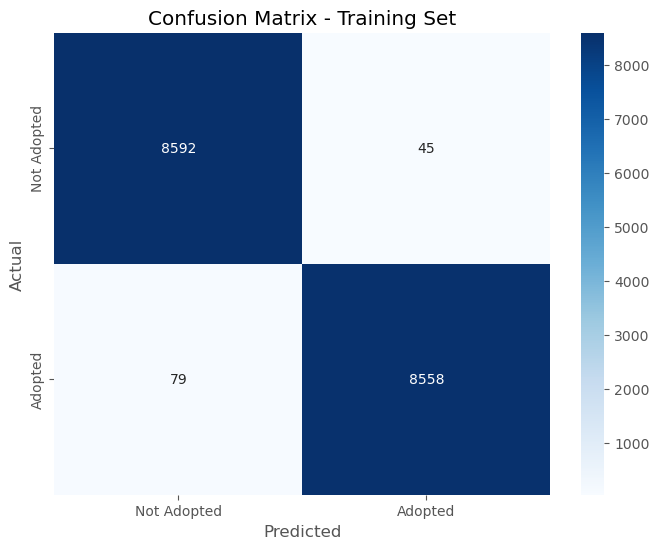

In [134]:
# Make predictions on the training set
y_train_pred = best_tree_model.predict(X_train_bin_resampled_scaled)

# Evaluate the model on the training set
print("Training Set Classification Report:\n", classification_report(y_train_bin_resampled, y_train_pred))

# Compute confusion matrix for the training set
cm_train = confusion_matrix(y_train_bin_resampled, y_train_pred)

# Plot the confusion matrix for the training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Adopted', 'Adopted'],
            yticklabels=['Not Adopted', 'Adopted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

Cross-Validation Accuracy Scores: [0.85296671 0.8593343  0.85065123 0.85470333 0.84365953]
Mean CV Accuracy Score: 0.8523 (+/- 0.0052)
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.41      0.47       840
           1       0.79      0.88      0.83      2159

    accuracy                           0.75      2999
   macro avg       0.68      0.64      0.65      2999
weighted avg       0.73      0.75      0.73      2999

Accuracy: 0.746915638546182


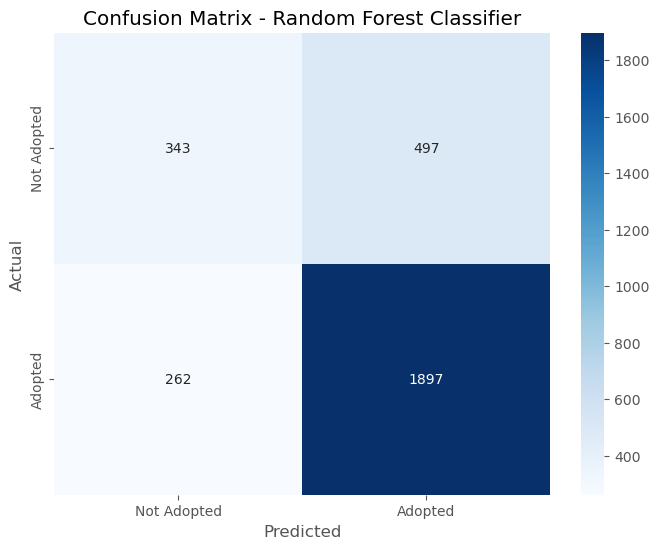

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Define the cross-validation strategy
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_bin_resampled_scaled, y_train_bin_resampled, cv=kf, scoring='accuracy')

# Print cross-validation scores
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Train the model on the entire training set
rf_model.fit(X_train_bin_resampled_scaled, y_train_bin_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_bin_scaled)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test_bin, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_bin, y_pred_rf))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test_bin, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Adopted', 'Adopted'],
            yticklabels=['Not Adopted', 'Adopted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

Cross-Validation Accuracy Scores: [0.6089725  0.6089725  0.60260492 0.55340087 0.60683266]
Mean CV Accuracy Score: 0.5962 (+/- 0.0215)
Gaussian Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.62      0.42       840
           1       0.77      0.48      0.59      2159

    accuracy                           0.52      2999
   macro avg       0.54      0.55      0.50      2999
weighted avg       0.64      0.52      0.54      2999

Accuracy: 0.5188396132044014


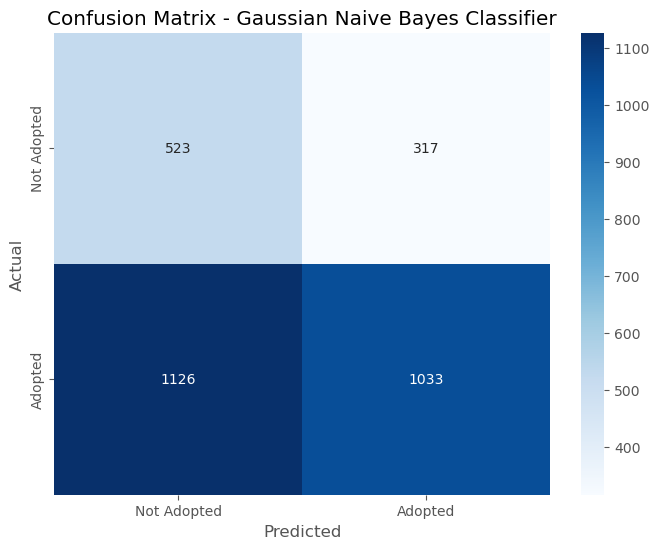

In [65]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb_model, X_train_bin_resampled_scaled, y_train_bin_resampled, cv=cv_strategy, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Train the model on the resampled and scaled training data
nb_model.fit(X_train_bin_resampled_scaled, y_train_bin_resampled)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test_bin_scaled)

# Evaluate the model
print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test_bin, y_pred_nb))
print("Accuracy:", accuracy_score(y_test_bin, y_pred_nb))

# Compute confusion matrix
cm_nb = confusion_matrix(y_test_bin, y_pred_nb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Adopted', 'Adopted'],
            yticklabels=['Not Adopted', 'Adopted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naive Bayes Classifier')
plt.show()

## 1.2. Learning and Evaluating Classifiers

...

## 1.3. Classification - Final Discussion and Conclusions 

...

## Task 2 (Unsupervised Learning) - Charactering Pets and their Adoption Speed

In this task you should **use unsupervised learning to characterize pets and their adoption speed**. You have 2 clustering:
1. **Use Clustering algorithms to find similar groups of adopted pets.** When animals are adopted, is it possible to find groups of pets with the same/similar adoption speed? Evaluate clustering results using **internal and external metrics**.
2. **Be creative and define and explore your own unsupervised learning task!** What else would it be interesting to find out?

## 2.1. Preprocessing Data for Clustering

...

## 2.2. Learning and Evaluating Clusterings

...

## 2.3. Clustering - Final Discussion and Conclusions

...

## 3. Final Comments and Conclusions

...